<a href="https://colab.research.google.com/github/praveenbommalibits/algo-practice/blob/master/Yulu_Hypothesis_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yulu Introduction:

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


**Column Profiling:**

- **datetime:** datetime
- **season:** season (1: spring, 2: summer, 3: fall, 4: winter)
- **holiday:** whether day is a holiday or not (extracted from [http://dchr.dc.gov/page/holiday-schedule](http://dchr.dc.gov/page/holiday-schedule))
- **workingday:** if day is neither weekend nor holiday is 1, otherwise is 0.
- **weather:**
    1. Clear, Few clouds, partly cloudy, partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp:** temperature in Celsius
- **atemp:** feeling temperature in Celsius
- **humidity:** humidity
- **windspeed:** wind speed
- **casual:** count of casual users
- **registered:** count of registered users
- **count:** count of total rental bikes including both casual and registered


**Problem Statement:**

The company seeks to address the following questions related to the demand for shared electric cycles in the Indian market:

1. **Identification of Significant Variables:**
    - Determine the key variables that play a significant role in predicting the demand for shared electric cycles.
    - Explore and analyze the factors that have a substantial impact on the demand dynamics.

2. **Performance of Predictive Variables:**
    - Assess the effectiveness of the identified variables in describing and predicting the demand for electric cycles.
    - Evaluate how well these variables capture the intricacies and patterns of electric cycle demands in the Indian market.


In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import io
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import levene



In [2]:
# Loading data
from google.colab import files
uploaded = files.upload()


Saving bike_sharing.txt to bike_sharing.txt


In [3]:
yulu_df = pd.read_csv(io.StringIO(uploaded['bike_sharing.txt'].decode('utf-8')))

# Exploratory Data Analysis

In [4]:
yulu_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
yulu_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
yulu_df.shape

(10886, 12)

In [7]:
yulu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#### Conversion of categorical attributes

In [8]:
yulu_df['datetime']= pd.to_datetime(yulu_df['datetime'])
yulu_df['season']= yulu_df['season'].map(str)
yulu_df['holiday']= yulu_df['holiday'].map(str)
yulu_df['workingday']= yulu_df['workingday'].map(str)
yulu_df['weather']= yulu_df['weather'].map(str)

season_mapping = {'1':'spring', '2':'summer', '3':'fall', '4':'winter'}
yulu_df["season"] = yulu_df["season"].map(lambda x: season_mapping[x])

holiday_mapping = {'0':'no', '1':'yes'}
yulu_df["holiday"] = yulu_df["holiday"].map(lambda x: holiday_mapping[x])

working_day_mapping = {'0':'no', '1':'yes'}
yulu_df["workingday"] = yulu_df["workingday"].map(lambda x: working_day_mapping[x])

weather_mapping = {'1':'clear', '2':'partly_clear', '3':'rain', '4':'intense'}
yulu_df["weather"] = yulu_df["weather"].map(lambda x: weather_mapping[x])


#### Statistical Summary

In [9]:
yulu_df.describe(include = ['object','datetime64[ns]'])


,datetime,season,holiday,workingday,weather
count,10886,10886,10886,10886,10886
unique,10886,4,2,2,4
top,2011-01-01 00:00:00,winter,no,yes,clear
freq,1,2734,10575,7412,7192
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2012-12-19 23:00:00,NaN,NaN,NaN,NaN


In [10]:
yulu_df.describe(include = ['int64','float64'])


,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
for i in yulu_df.columns:
  print(f'{i} has {yulu_df[i].nunique()} unique values')

datetime has 10886 unique values
season has 4 unique values
holiday has 2 unique values
workingday has 2 unique values
weather has 4 unique values
temp has 49 unique values
atemp has 60 unique values
humidity has 89 unique values
windspeed has 28 unique values
casual has 309 unique values
registered has 731 unique values
count has 822 unique values


In [12]:
# Duplicates check
yulu_df.duplicated().any()


False

# Visual Analysis - Univariate

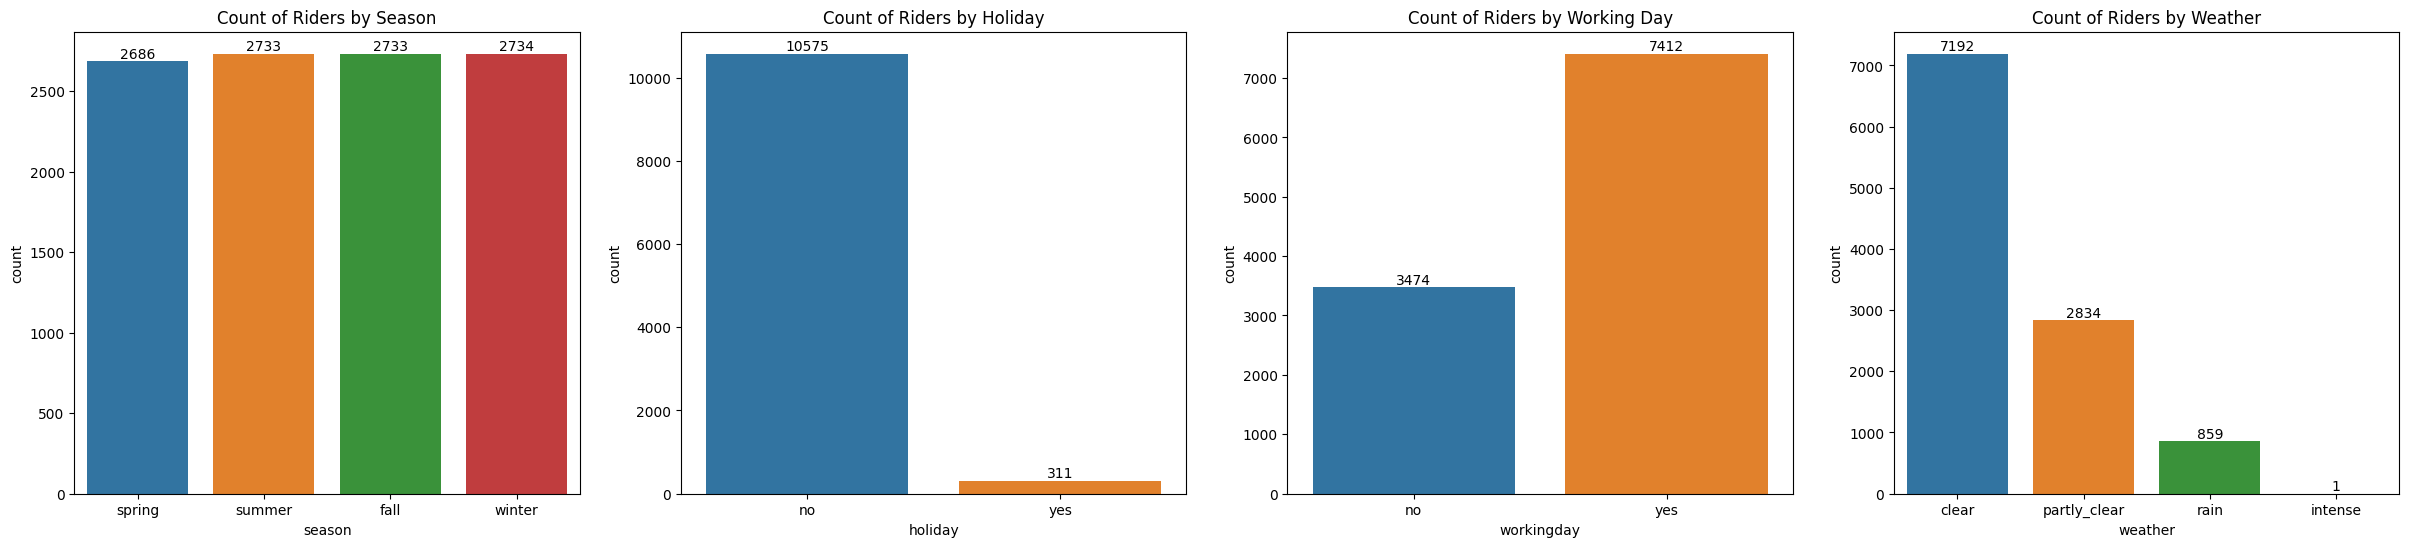

In [13]:
fig,axes=plt.subplots(nrows=1, ncols=4, figsize=(30,6))
sns.countplot(x='season', data=yulu_df, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Riders by Season')
sns.countplot(x='holiday', data=yulu_df, ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
axes[1].set_title('Count of Riders by Holiday')
sns.countplot(x='workingday', data=yulu_df, ax=axes[2])
axes[2].bar_label(axes[2].containers[0])
axes[2].set_title('Count of Riders by Working Day')
sns.countplot(x='weather', data=yulu_df, ax=axes[3])
axes[3].bar_label(axes[3].containers[0])
axes[3].set_title('Count of Riders by Weather')
plt.show()



#### Observations:

- Rider turnout remains consistent across all seasons.

- The majority of riders (97%) prefer non-holiday days.

- A significant portion of riders (68%) opts for commuting on weekdays.

- Approximately 92% of riders choose days characterized by clear or partly clear weather for their rides.

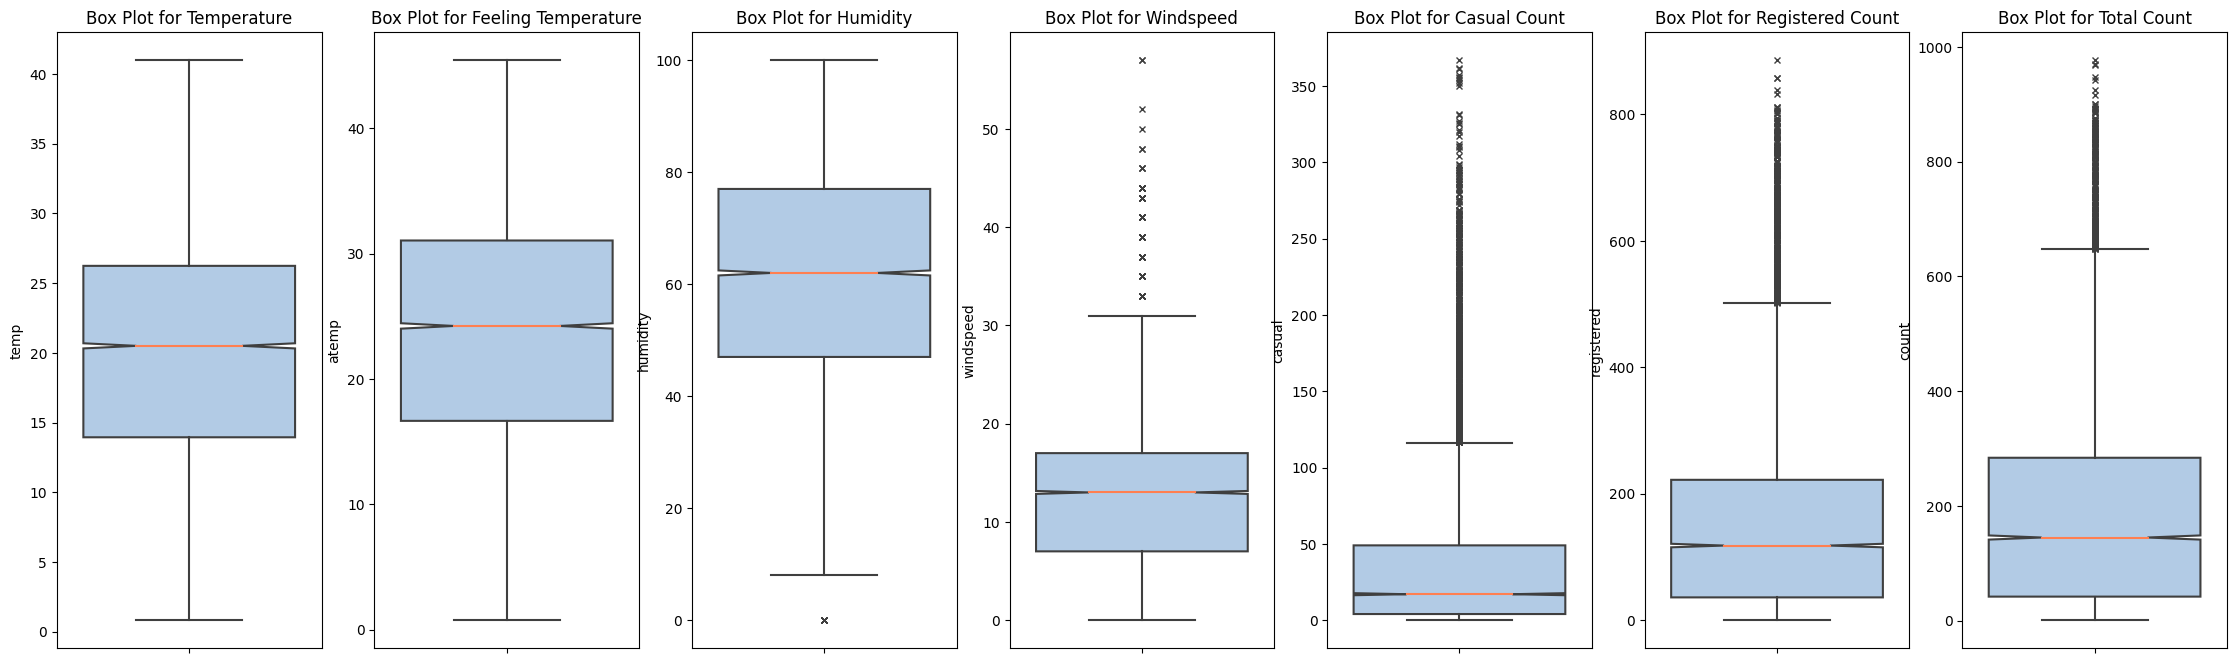

In [14]:
fig,axes=plt.subplots(1,7,figsize=(28,8))
sns.boxplot(data=yulu_df, y="temp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[0])
axes[0].set_title('Box Plot for Temperature')

sns.boxplot(data=yulu_df, y="atemp",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[1])
axes[1].set_title('Box Plot for Feeling Temperature')

sns.boxplot(data=yulu_df, y="humidity",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[2])
axes[2].set_title('Box Plot for Humidity')

sns.boxplot(data=yulu_df, y="windspeed",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[3])
axes[3].set_title('Box Plot for Windspeed')

sns.boxplot(data=yulu_df, y="casual",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[4])
axes[4].set_title('Box Plot for Casual Count')

sns.boxplot(data=yulu_df, y="registered",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[5])
axes[5].set_title('Box Plot for Registered Count')

sns.boxplot(data=yulu_df, y="count",
            notch=True, showcaps=True,
            flierprops={"marker": "x"},
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"}, ax = axes[6])
axes[6].set_title('Box Plot for Total Count')

plt.show()

#### Observations:
- The dataset indicates that both the mean and median temperatures hover around 20°C.

- For perceived temperature (feeling temperature), both the mean and median values center around approximately 24°C.

- Humidity levels exhibit a mean and median of roughly 62% in the dataset.

- Windspeed tends to be around 13, although a notable number of outliers are observed.

- From January 1, 2011, to December 19, 2012, there are numerous outliers in the counts for casual, registered, and total riders. This spike may be attributed to a surge in the number of riders during this period. Further investigation through time series analysis will shed light on this trend.

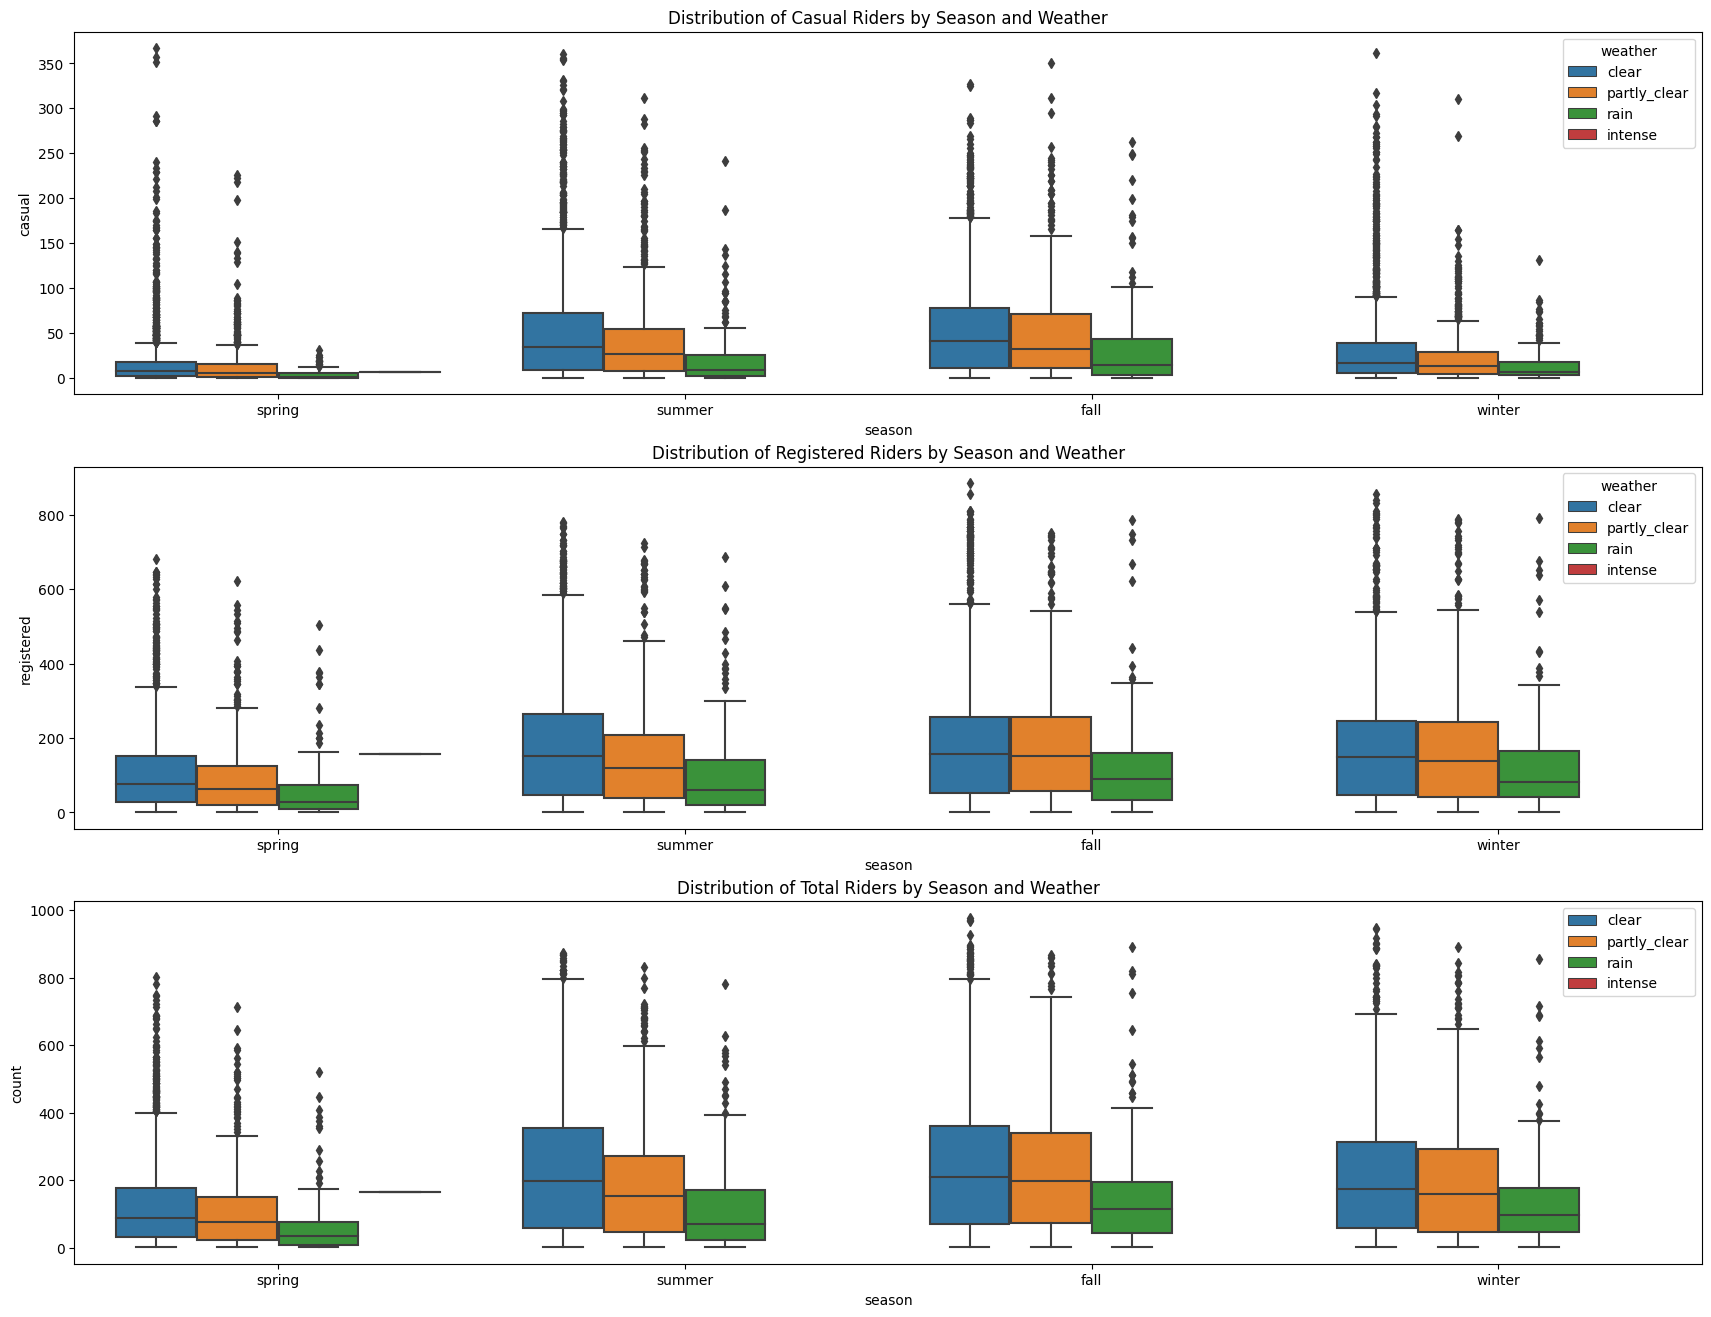

In [15]:
fig,axes=plt.subplots(3,1,figsize=(21,16))

sns.boxplot(data=yulu_df, y="casual", x = 'season', hue = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season and Weather')

sns.boxplot(data=yulu_df, y="registered", x = 'season', hue = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season and Weather')

sns.boxplot(data=yulu_df, y="count", x = 'season', hue = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season and Weather')
plt.legend(loc='upper right')
plt.show()


#### Observation:
-  In every season, the highest rider turnout is observed during clear and partly clear weather conditions.

# Visual Analysis - Bivariate Analysis

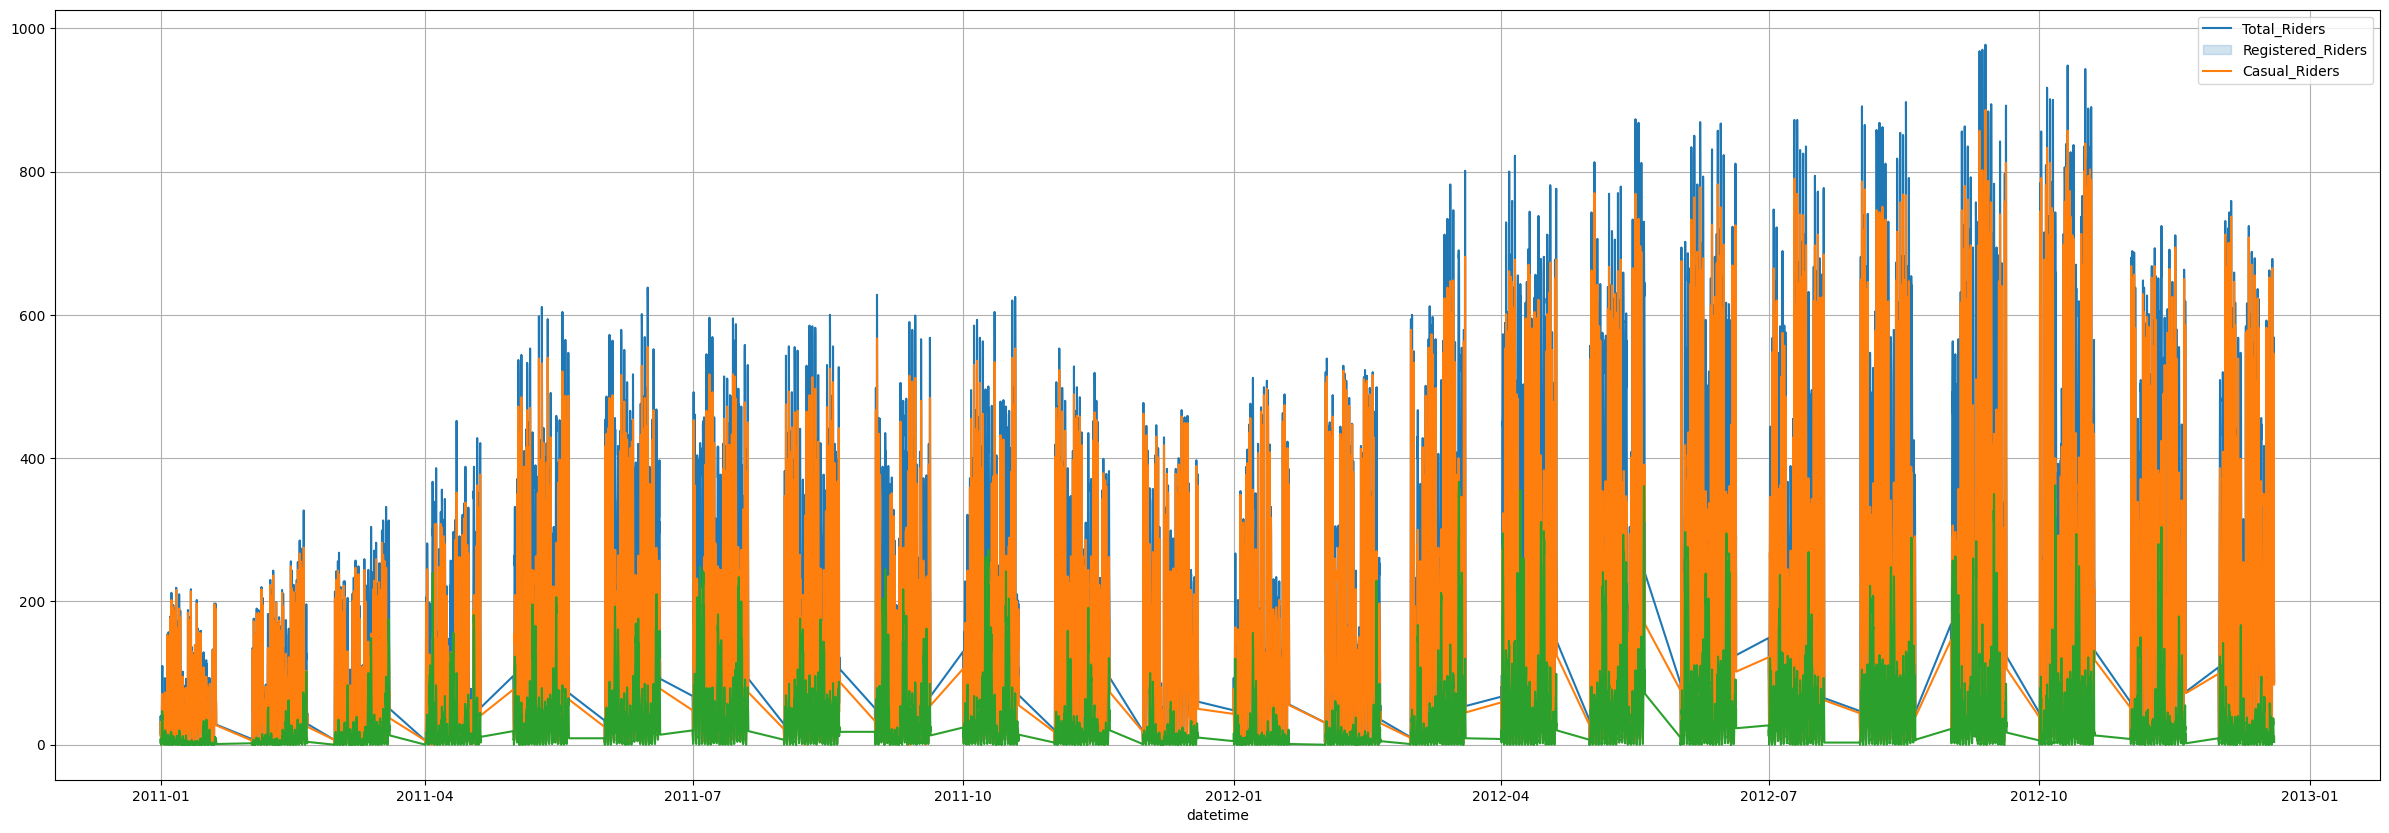

In [16]:
plt.figure(figsize=(30,10))
sns.color_palette('husl')
sns.lineplot(x = yulu_df['datetime'],y = yulu_df['count'].values)
sns.lineplot(x = yulu_df['datetime'],y = yulu_df['registered'].values)
sns.lineplot(x = yulu_df['datetime'],y = yulu_df['casual'].values)
plt.legend(['Total_Riders','Registered_Riders','Casual_Riders'])
plt.grid()
plt.show()

#### Observations:
- A substantial increase is noted in the counts of casual, registered, and total riders during the period spanning from January 1, 2011, to December 19, 2012.

- Clear patterns of trend and seasonality emerge, illustrating a consistent rise in rider numbers from spring to summer to fall. This is followed by a decline in the winter season, only to witness a subsequent resurgence in the following spring.

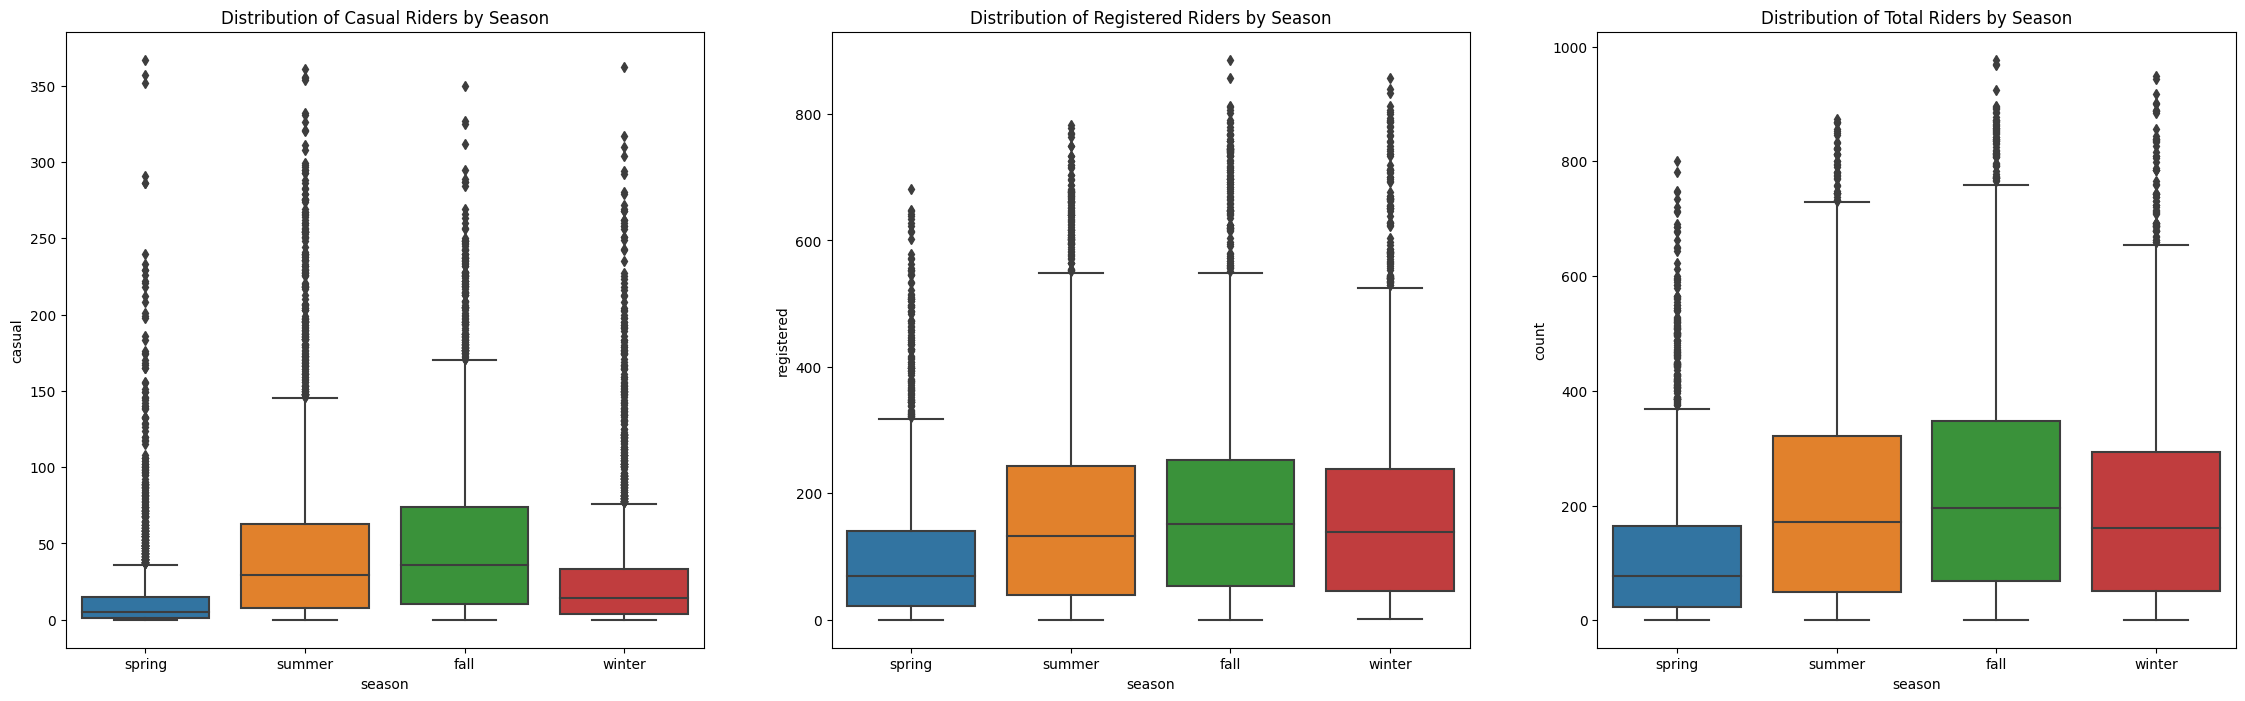

In [17]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu_df, y="casual", x = 'season', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Season')

sns.boxplot(data=yulu_df, y="registered", x = 'season', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Season')

sns.boxplot(data=yulu_df, y="count", x = 'season', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Season')

plt.show()

#### Observation:
- The median count of casual, registered, and total riders reaches its peak during the fall and summer seasons, followed by the winter and spring seasons in descending order.

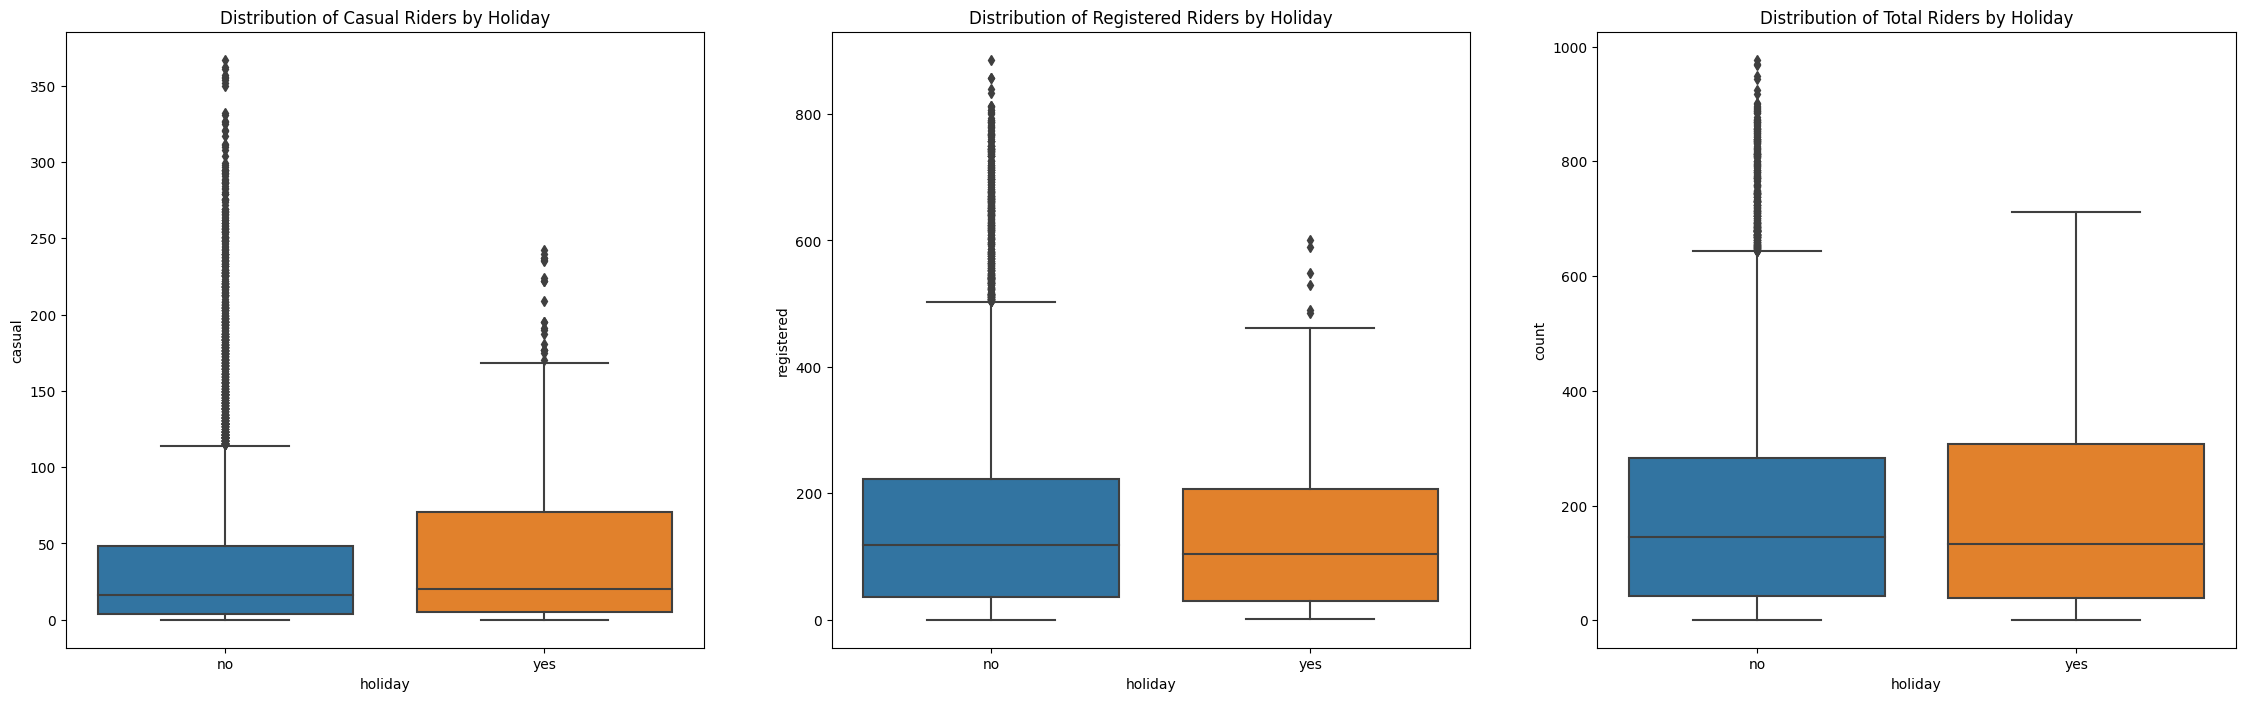

In [18]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu_df, y="casual", x = 'holiday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Holiday')

sns.boxplot(data=yulu_df, y="registered", x = 'holiday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Holiday')

sns.boxplot(data=yulu_df, y="count", x = 'holiday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Holiday')

plt.show()

#### Observation:
- The median count of casual, registered, and total riders remains nearly identical, regardless of whether it is a holiday or a non-holiday.

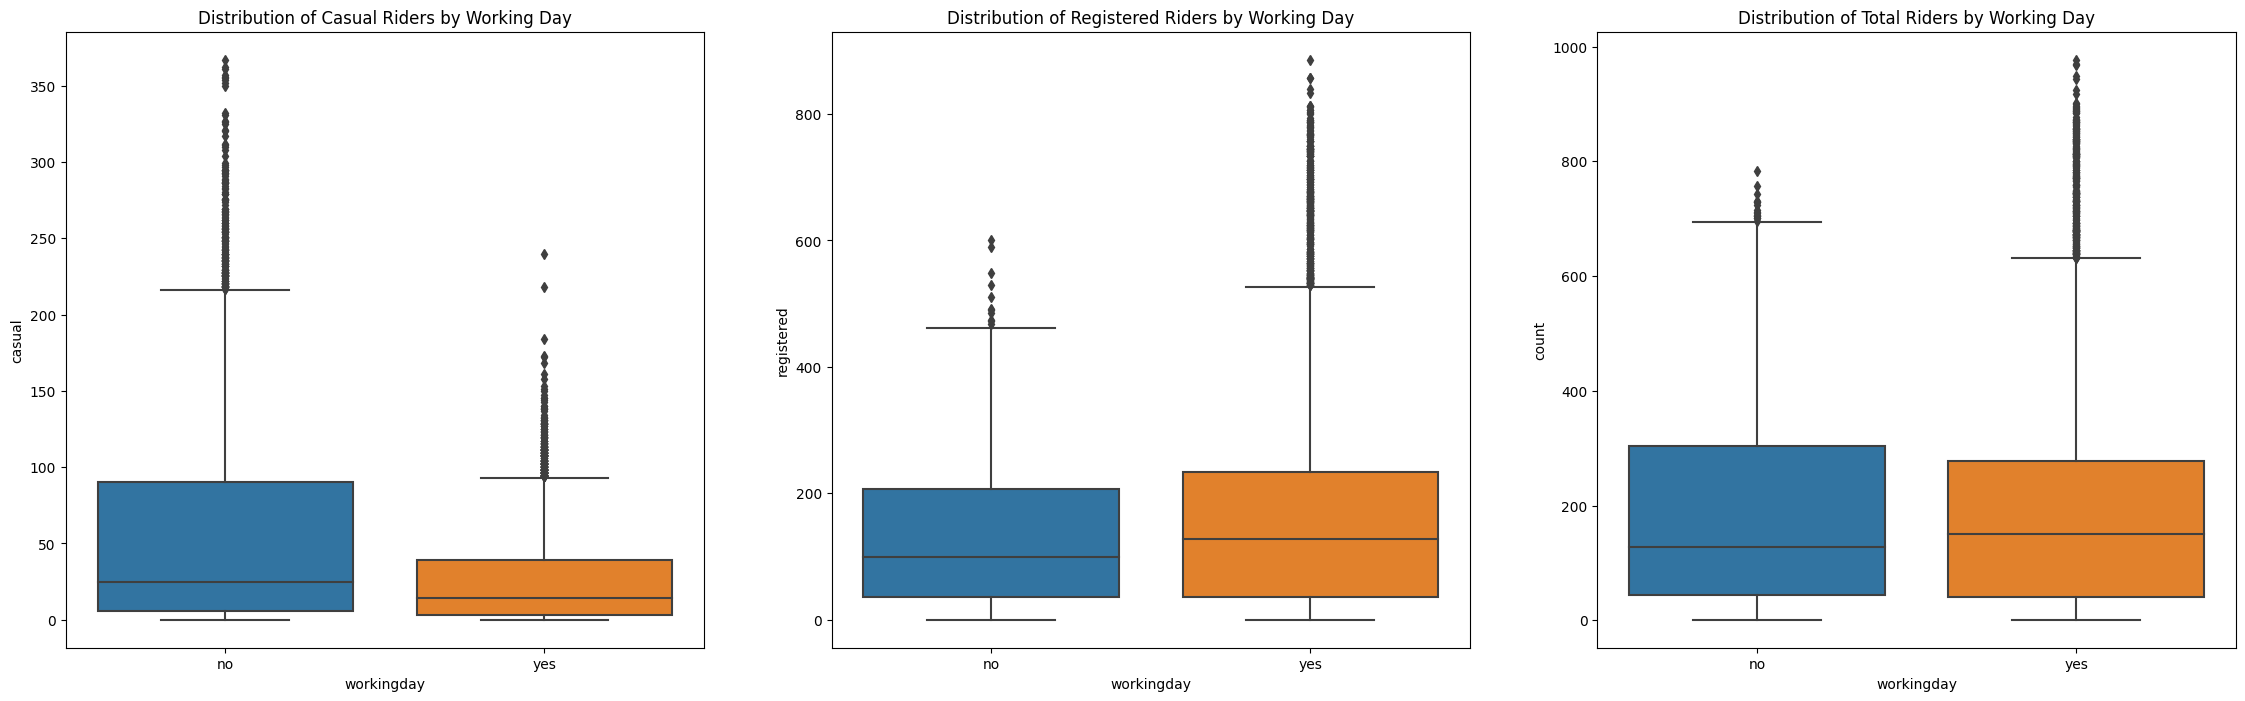

In [19]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu_df, y="casual", x = 'workingday', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Working Day')

sns.boxplot(data=yulu_df, y="registered", x = 'workingday', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Working Day')

sns.boxplot(data=yulu_df, y="count", x = 'workingday', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Working Day')

plt.show()

#### Observation:
- The median count of casual, registered, and total riders remains nearly equal, irrespective of whether it is a working day or a non-working day.

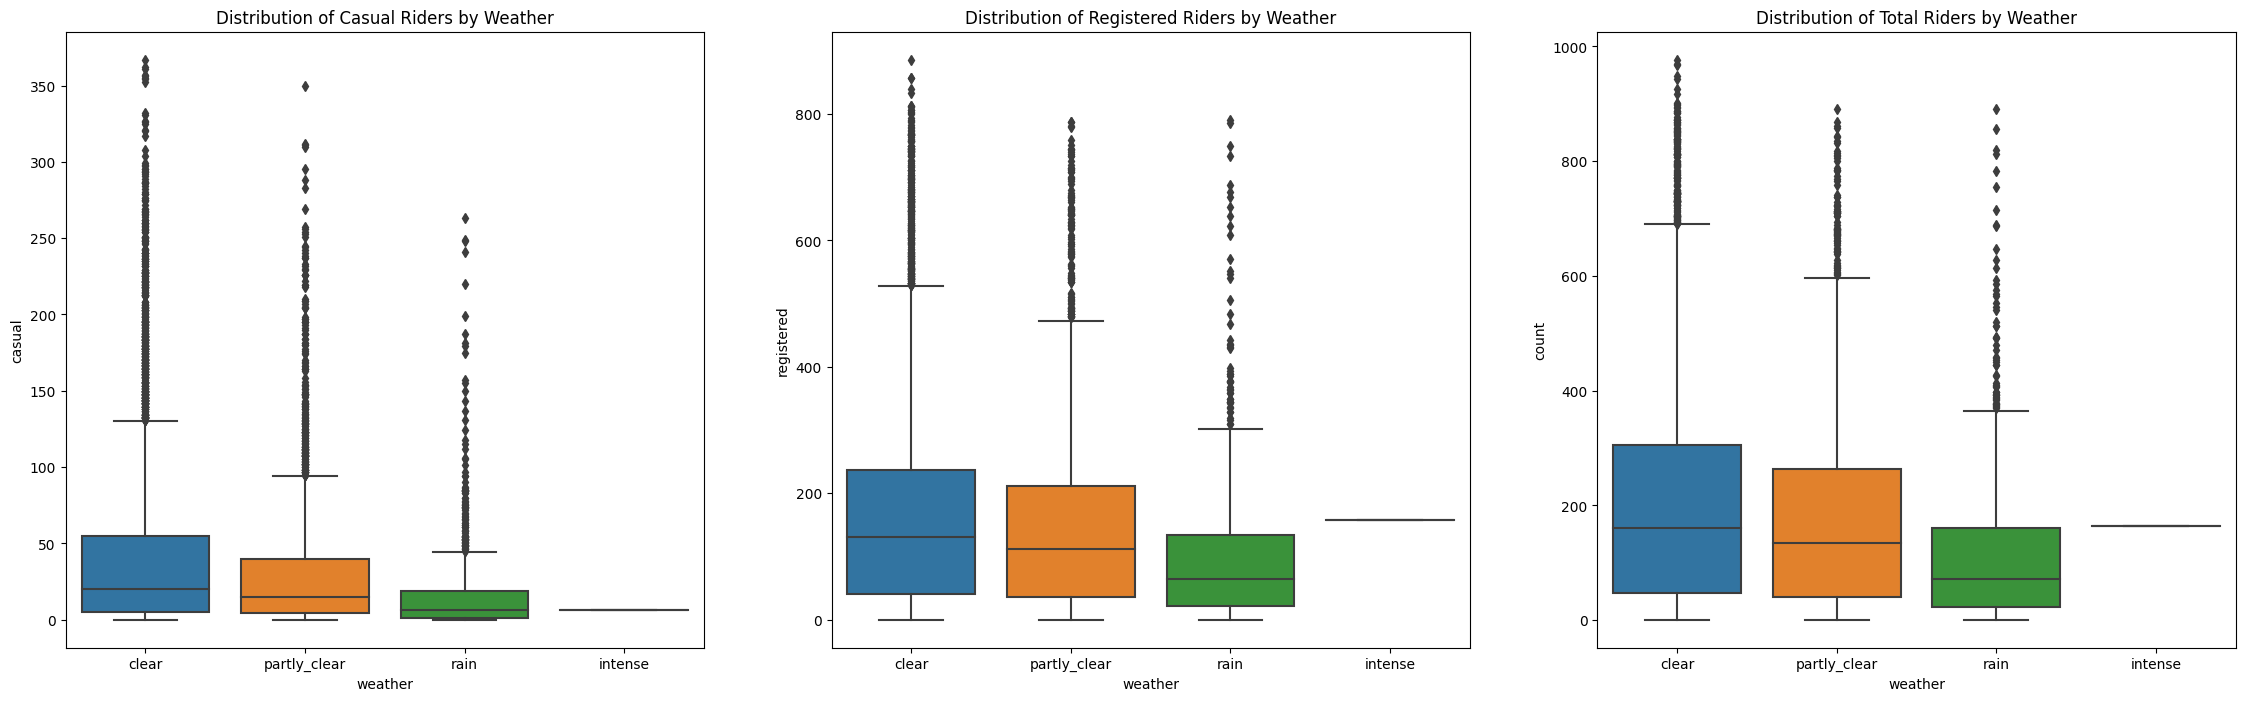

In [20]:
fig,axes=plt.subplots(1,3,figsize=(28,8))

sns.boxplot(data=yulu_df, y="casual", x = 'weather', ax=axes[0])
axes[0].set_title('Distribution of Casual Riders by Weather')

sns.boxplot(data=yulu_df, y="registered", x = 'weather', ax=axes[1])
axes[1].set_title('Distribution of Registered Riders by Weather')

sns.boxplot(data=yulu_df, y="count", x = 'weather', ax=axes[2])
axes[2].set_title('Distribution of Total Riders by Weather')

plt.show()

#### Observation:
-
The median count of casual, registered, and total riders attains its highest level during clear weather conditions, followed by a slightly lower median count during partly clear weather.

# Visual Analysis - Correlation

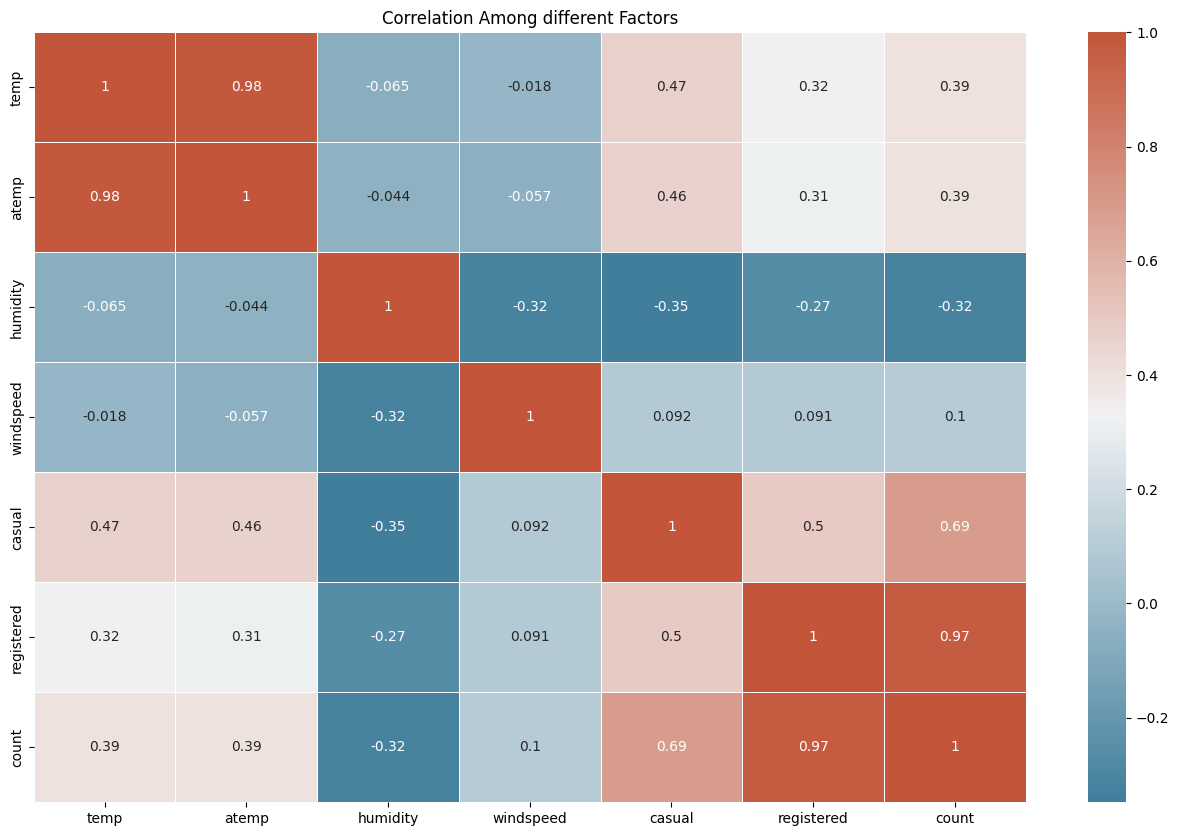

In [21]:
yulu_corr = yulu_df.corr()
plt.figure(figsize=(16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among different Factors')
sns.heatmap(yulu_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

#### Observation:
- The correlation between {temperature, feeling temperature, humidity, and windspeed} and {casual, registered, and total count} variables is notably low.

- A very strong correlation exists between temperature and feeling temperature, indicating a close relationship between these two variables.

- There is a very strong correlation between casual riders and total riders, as the count of casual riders significantly influences the total number of riders for Yulu.

- Similarly, a very strong correlation is observed between registered riders and total riders, highlighting the significant contribution of registered riders to the overall count for Yulu.

# Outlier Treatment


<Axes: xlabel='count', ylabel='Density'>

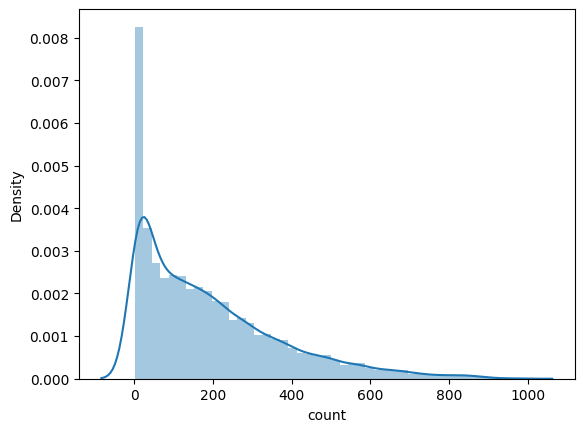

In [22]:
sns.distplot(yulu_df['count'])

#### Observation:
- The data exhibits a right-skewed distribution, as evident from the visual representation.

In [23]:
yulu_df['log_count']=np.log(yulu_df['count'])

<Axes: xlabel='log_count', ylabel='Density'>

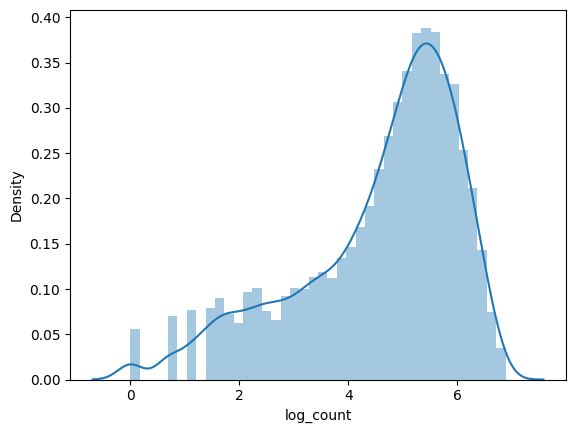

In [24]:
sns.distplot(yulu_df['log_count'])

#### Observation:
- Upon applying a logarithmic transformation, the data distribution appears to approximate a normal distribution.

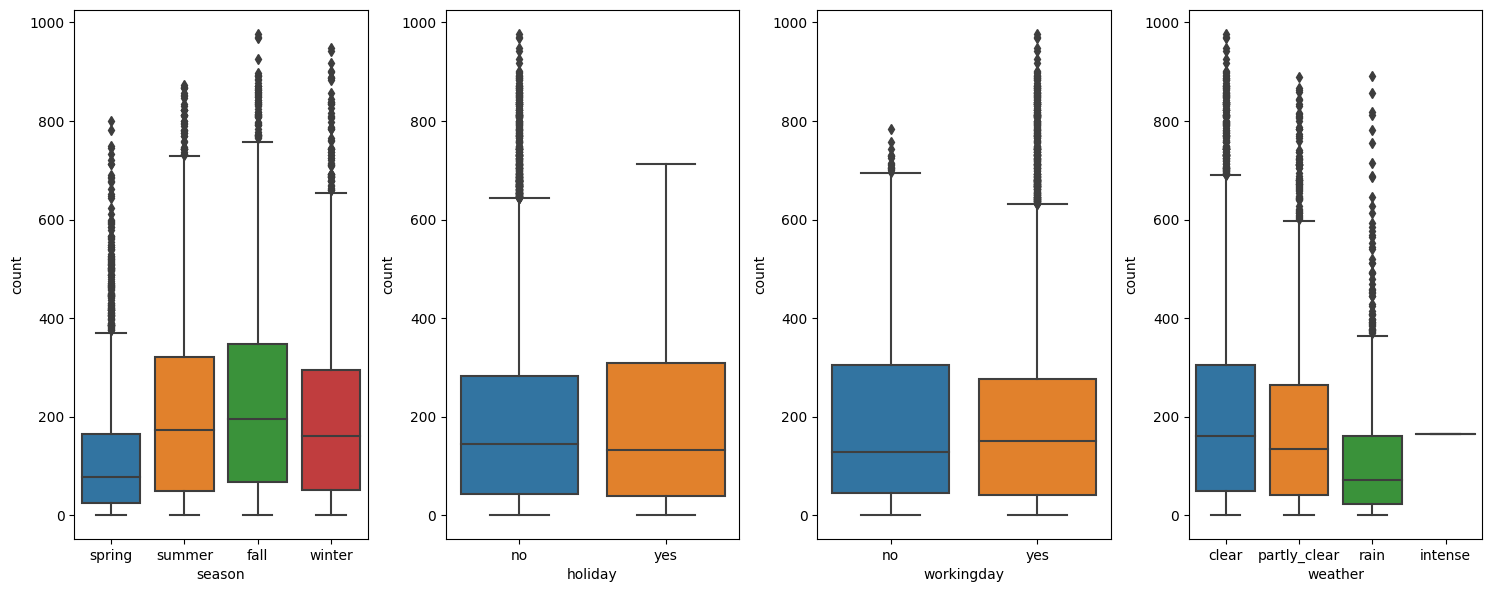

In [25]:
plt.figure(figsize=(15,6))
categorical_features=['season', 'holiday', 'workingday','weather']

for i,j in enumerate(categorical_features):
 plt.subplot(1,len(categorical_features),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(x=j, y='count', data=yulu_df)
 plt.tight_layout(pad=1)

#### Observation:
The visual analysis of the figure suggests that the median is consistent for both groups of working day and holiday. However, to validate and draw statistically significant conclusions, hypothesis testing would be a valuable step. Conducting appropriate hypothesis tests can provide clarity on whether there is a significant difference in counts between working days and holidays, adding a quantitative dimension to the observed visual pattern.

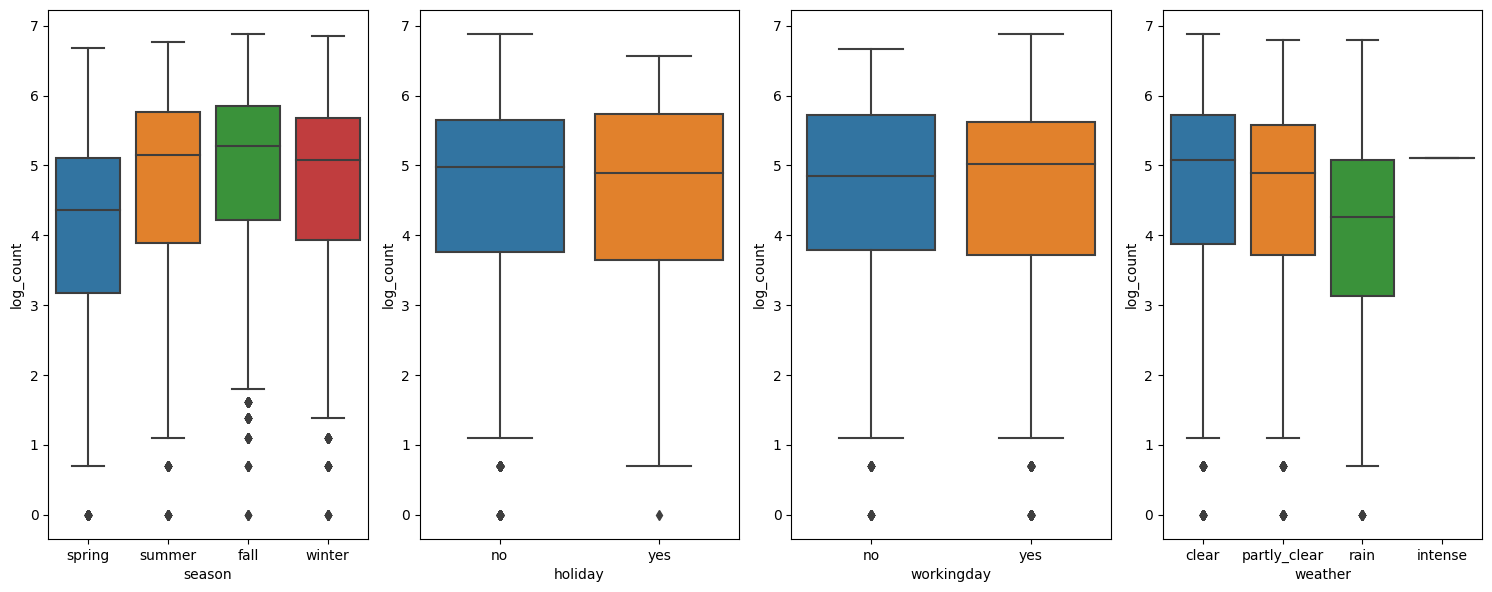

In [26]:
plt.figure(figsize=(15,6))
categorical_features=['season', 'holiday', 'workingday','weather']

for i,j in enumerate(categorical_features):
 plt.subplot(1,len(categorical_features),i+1)
 plt.subplots_adjust(hspace = 0.8)
 sns.boxplot(x=j, y='log_count', data=yulu_df)
 plt.tight_layout(pad=1)

<Axes: >

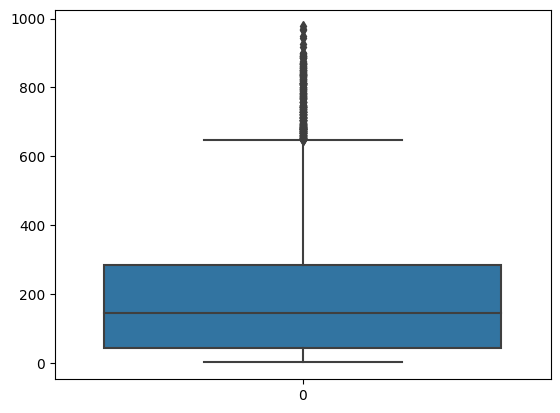

In [27]:
sns.boxplot(yulu_df['count'])


<Axes: >

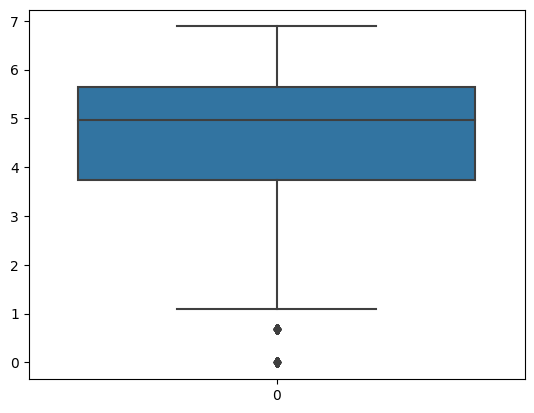

In [28]:
sns.boxplot(yulu_df['log_count'])

#### Observation:
Indeed, the figures indicate that applying a logarithmic transformation has been effective in reducing the impact of outliers in the dataset. This transformation often proves beneficial in stabilizing variance and making the data more amenable to analysis.


# Hypothesis Testing
#### Hypothesis Testing  different features

#### Hypothesis framework to test the effect of working day on the number of electric cycles rented

> Null Hypothesis (Ho):
`Working Day has no effect on the number of electric cycles rented.`

> Alternative Hypothesis (H1):
`Working Day has an effect on the number of electric cycles rented.`

> Significance Level(α): `0.05 or 5%`

> Test Statistic: `Two Sample T-test`






In [29]:

# Separate data for working and non-working days
working_days_data = yulu_df[yulu_df['workingday'] == 'yes']['count']
non_working_days_data = yulu_df[yulu_df['workingday'] == 'no']['count']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(working_days_data, non_working_days_data, equal_var=False)

# Set significance level
alpha = 0.05

print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level
if p_value <= alpha:
    print("Reject the null hypothesis. Working Day has a significant effect on the number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that Working Day has an effect.")


Test Statistic: 1.2362580418223226
P-value: 0.21640312280695098
Fail to reject the null hypothesis. There is no significant evidence that Working Day has an effect.


Conclusion:
-  The p-value of `0.216` is greater than the typical significance level of 0.05. Therefore, we do not have enough evidence to conclude that there is a significant effect of working day on the number of electric cycles rented.
- Convey that,  we cannot reject the idea that working day has no effect on the number of electric cycles rented based on the available data.

#### Hypothesis framework to test the effect of holidays on the number of electric cycles rented

> Null Hypothesis (Ho):
`Holiday has no effect on the number of electric cycles rented`

> Alternative Hypothesis (H1):
`Holiday has an effect on the number of electric cycles rented`

> Significance Level(α): `0.05 or 5%`

> Test Statistic: `Two Sample T-test`






In [30]:

# Separate data for holidays and non-holidays
holiday_data = yulu_df[yulu_df['holiday'] == 'yes']['count']
non_holiday_data = yulu_df[yulu_df['holiday'] == 'no']['count']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(holiday_data, non_holiday_data, equal_var=False)

# Set significance level
alpha = 0.05

# Print results
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level
if p_value <= alpha:
    print("Reject the null hypothesis. Holiday has a significant effect on the number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that Holiday has an effect.")


Test Statistic: -0.6041892778480382
P-value: 0.5461309933605478
Fail to reject the null hypothesis. There is no significant evidence that Holiday has an effect.


Conclusion:
- The p-value of 0.546 is greater than the typical significance level of 0.05. Therefore, we do not have enough evidence to conclude that there is a significant effect of holidays on the number of electric cycles rented.
- Convey, we cannot reject the idea that holidays have no effect on the number of electric cycles rented based on the available data.

####  Hypothesis framework to test the effect of seasons on the number of electric cycles rented

> Null Hypothesis (Ho):
`Season has no effect on the number of electric cycles rented`

> Alternative Hypothesis (H1):
`Season has an effect on the number of electric cycles rented`

> Significance Level(α): `0.05 or 5%`

> Test Statistic: `One-Way Analysis of Variance (ANOVA)`

> Reason for Using ANOVA:
The one-way ANOVA is used when you have more than two groups to compare (in this case, more than two seasons).






In [31]:




# Extract data for each season
seasons = yulu_df['season'].unique()
data_by_season = [yulu_df[yulu_df['season'] == season]['count'] for season in seasons]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*data_by_season)

# Set significance level
alpha = 0.05

# Print results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level
if p_value <= alpha:
    print("Reject the null hypothesis. Season has a significant effect on the number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that Season has an effect.")


F-statistic: 236.94671081032106
P-value: 6.164843386499654e-149
Reject the null hypothesis. Season has a significant effect on the number of electric cycles rented.


Conclusion:
- The very low p-value of 6.16e-149, which is much smaller than the significance level, indicates that there is a significant effect of seasons on the number of electric cycles rented.
- Convey, based on the available data, we can confidently conclude that the season has a significant impact on the number of electric cycles rented.

####  Hypothesis framework to test the effect of weather on the number of electric cycles rented

> Null Hypothesis (Ho):
`Weather has no effect on the number of electric cycles rented`

> Alternative Hypothesis (H1):
`Weather has an effect on the number of electric cycles rented`

> Significance Level(α): `0.05 or 5%`

> Test Statistic: `One-Way Analysis of Variance (ANOVA)`

> Reason for Using ANOVA:
The one-way ANOVA is used when you have more than two groups to compare (in this case, more than two seasons).






In [32]:
# Extract data for each weather condition
weather_conditions = yulu_df['weather'].unique()
data_by_weather = [yulu_df[yulu_df['weather'] == weather]['count'] for weather in weather_conditions]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*data_by_weather)

# Set significance level
alpha = 0.05

# Print results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level
if p_value <= alpha:
    print("Reject the null hypothesis. Weather has a significant effect on the number of electric cycles rented.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that Weather has an effect.")


F-statistic: 65.53024112793271
P-value: 5.482069475935669e-42
Reject the null hypothesis. Weather has a significant effect on the number of electric cycles rented.


 Conclusion:
 - The very low p-value of 5.48e-42, which is much smaller than the significance level, indicates that there is a significant effect of weather on the number of electric cycles rented.
 - Therefore, based on the available data, we can confidently conclude that the weather has a significant impact on the number of electric cycles

####  Hypothesis testing the independence of weather and season using a Chi-Square Test of Independence : Weather on Seasons


> Null Hypothesis (Ho):
`There is no association between weather and season`

> Alternative Hypothesis (H1):
`There is an association between weather and season`

> Significance Level(α): `0.05 or 5%`

> Test Statistic: `Chi-Square Test of Independence`


Contingency Table:
season        fall  spring  summer  winter
weather                                   
clear         1930    1759    1801    1702
intense          0       1       0       0
partly_clear   604     715     708     807
rain           199     211     224     225

Chi-Square Statistic: 49.15865559689363
P-value: 1.5499250736864862e-07

Reject the null hypothesis. Weather is dependent on season.


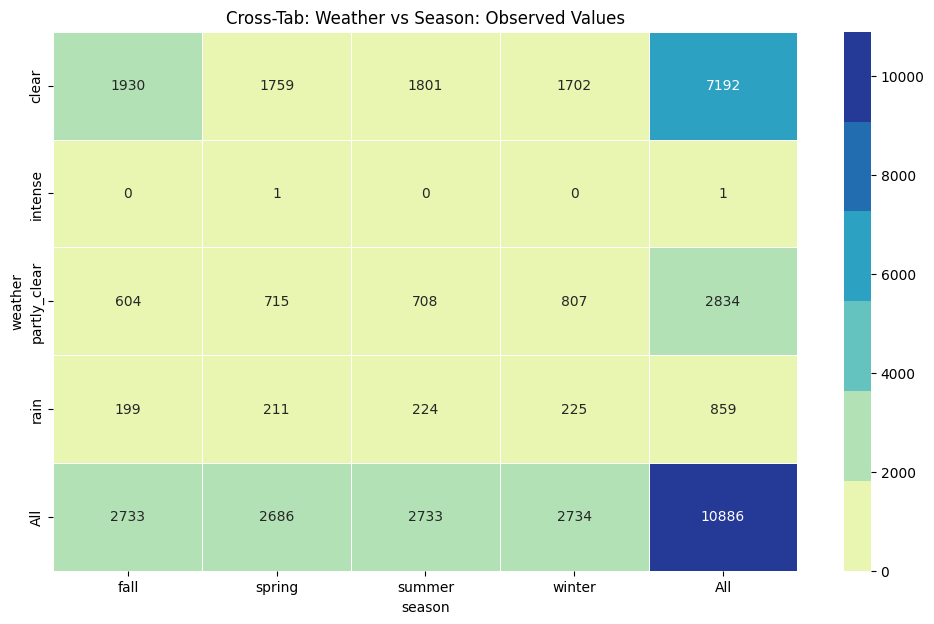

In [33]:



weather_season_table = pd.crosstab(yulu_df['weather'], yulu_df['season'])

# Perform Chi-Square Test of Independence
chi2, p_value, _, _ = chi2_contingency(weather_season_table)

# Print the contingency table
print("Contingency Table:")
print(weather_season_table)

# Print results
print(f'\nChi-Square Statistic: {chi2}')
print(f'P-value: {p_value}')

# Compare p-value to significance level
alpha = 0.05
if p_value <= alpha:
    print("\nReject the null hypothesis. Weather is dependent on season.")
else:
    print("\nFail to reject the null hypothesis. There is no significant evidence of an association between weather and season.")

# heat map representation
df = pd.crosstab(index=yulu_df["weather"], columns=yulu_df["season"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

Note:  To ensure the validity of the Chi-Square Test of Independence, we must exclude data points corresponding to intense weather conditions. This precaution is taken to ensure that the expected value within each cell of the contingency table is at least five, which is a prerequisite for the reliable application of this test

Contingency Table:
season        fall  spring  summer  winter
weather                                   
clear         1930    1759    1801    1702
partly_clear   604     715     708     807
rain           199     211     224     225

Chi-Square Statistic: 46.101457310732485
P-value: 2.8260014509929403e-08

Reject the null hypothesis. Weather is dependent on season.


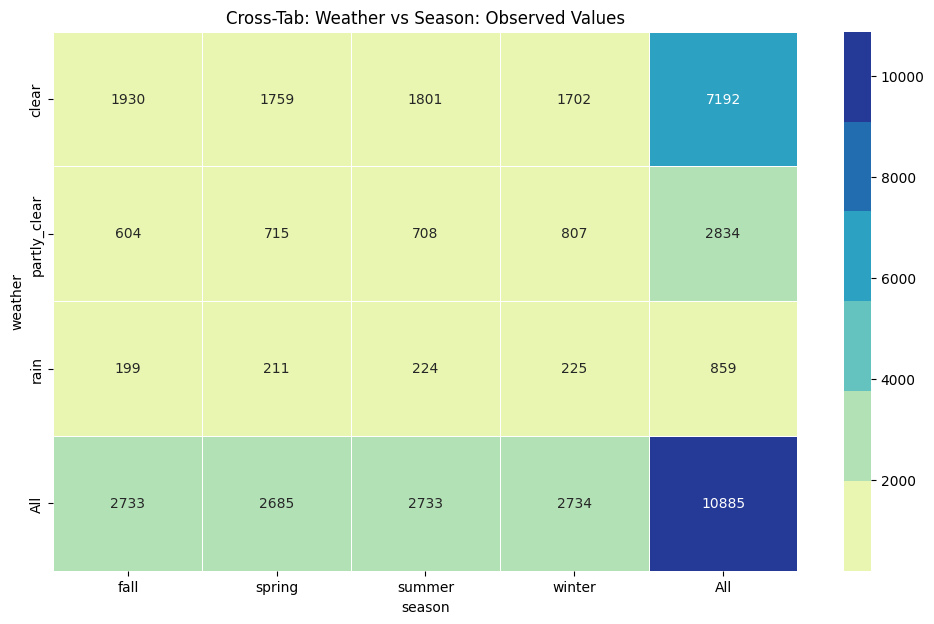

In [34]:

# Filter out intense weather conditions
filtered_data = yulu_df[yulu_df['weather'] != "intense"]

# Create a contingency table
weather_season_table = pd.crosstab(filtered_data['weather'], filtered_data['season'])

# Perform Chi-Square Test of Independence
chi2, p_value, _, _ = chi2_contingency(weather_season_table)

# Print the contingency table
print("Contingency Table:")
print(weather_season_table)

# Print results
print(f'\nChi-Square Statistic: {chi2}')
print(f'P-value: {p_value}')

# Compare p-value to significance level
alpha = 0.05
if p_value <= alpha:
    print("\nReject the null hypothesis. Weather is dependent on season.")
else:
    print("\nFail to reject the null hypothesis. There is no significant evidence of an association between weather and season.")

# heat map representation
df = pd.crosstab(index=filtered_data["weather"], columns=filtered_data["season"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(12,7))
plt.title('Cross-Tab: Weather vs Season: Observed Values')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

Conclusion:

- With the derived p-value, which is below the chosen significance level(0.05), we reject the null hypothesis asserting the independence of weather and season.
- This leads us to conclude, with 95% confidence, that there exists a significant dependence between weather and seasons.

In [35]:
yulu_df[yulu_df['weather']=='intense']

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,log_count
5631,2012-01-09 18:00:00,spring,no,yes,intense,8.2,11.365,86,6.0032,6,158,164,5.099866


# Distribution -  Normalization Test

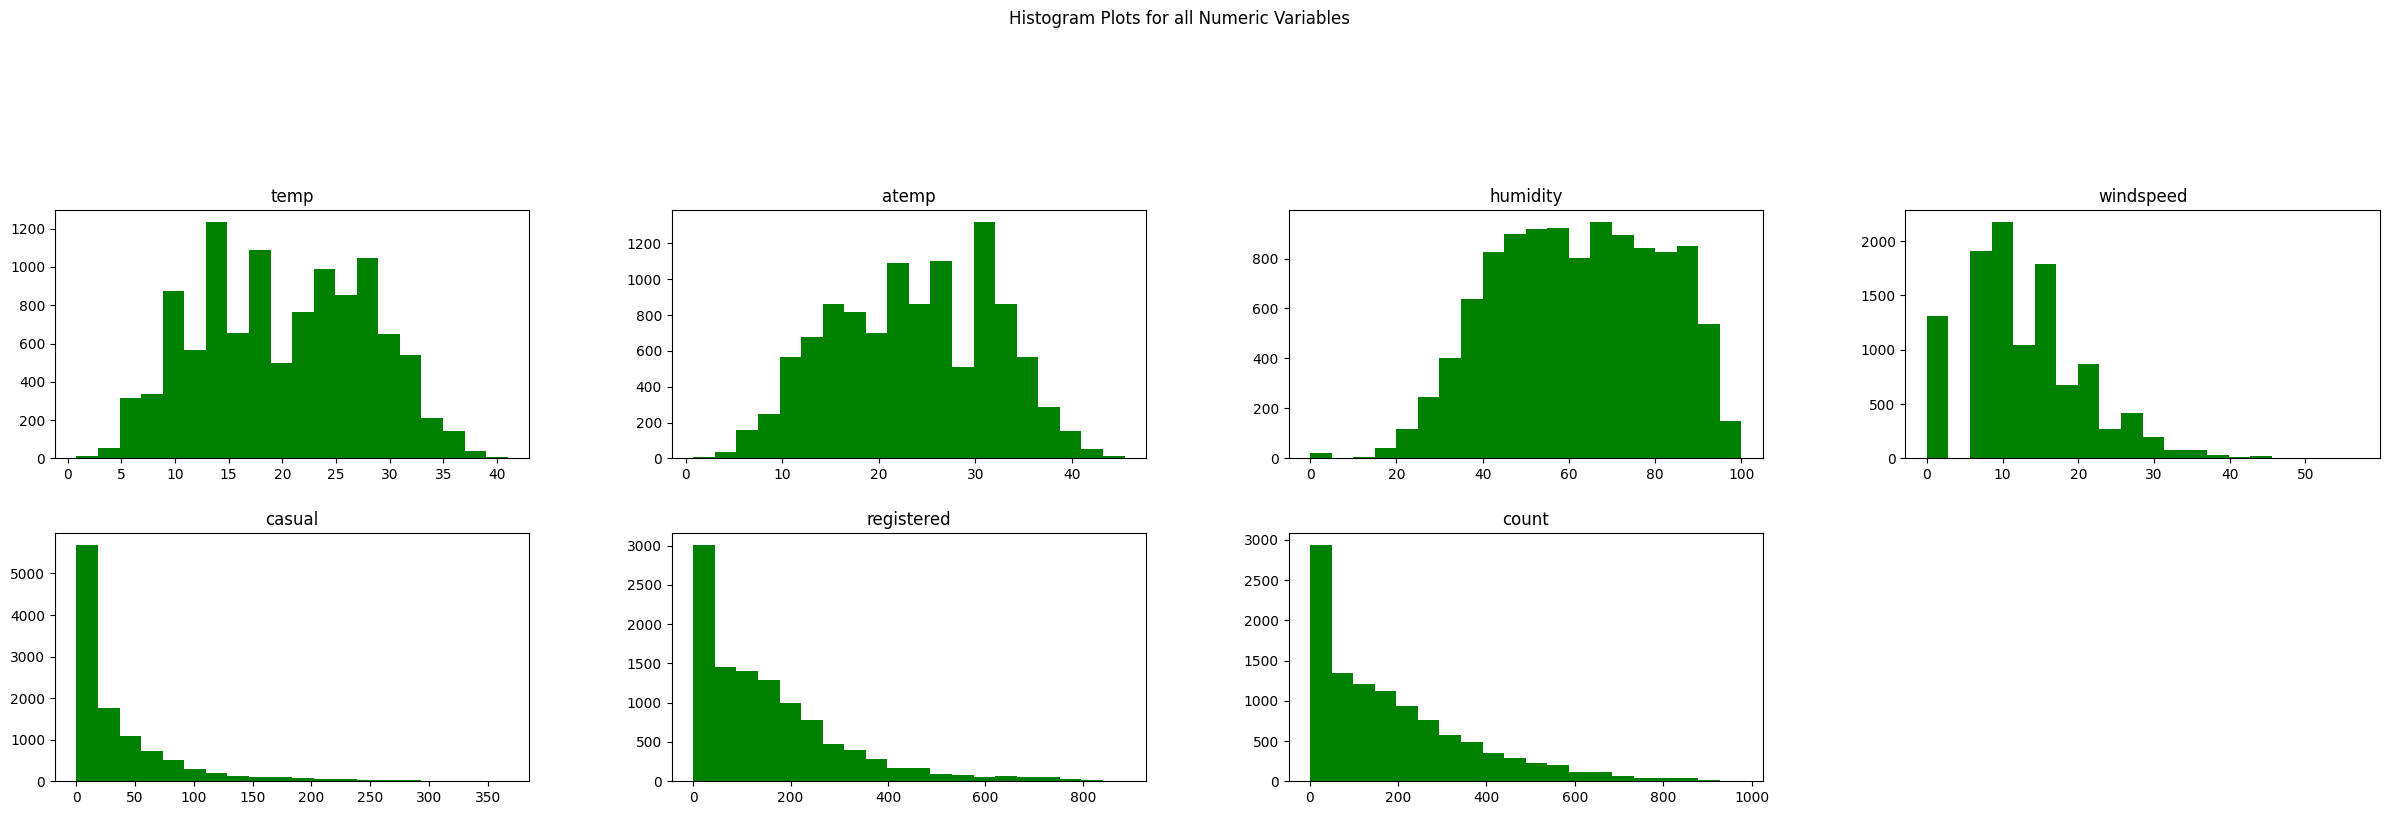

Shapiro-Wilk test for temp: Statistic=0.9804227352142334, p-value=4.577117001754969e-36
Feature: temp - not normally distributed.

Shapiro-Wilk test for atemp: Statistic=0.9815532565116882, p-value=3.35599504562436e-35
Feature: atemp - not normally distributed.

Shapiro-Wilk test for humidity: Statistic=0.9822683930397034, p-value=1.244270413072488e-34
Feature: humidity - not normally distributed.

Shapiro-Wilk test for windspeed: Statistic=0.958724856376648, p-value=0.0
Feature: windspeed - not normally distributed.

Shapiro-Wilk test for casual: Statistic=0.7056366205215454, p-value=0.0
Feature: casual - not normally distributed.

Shapiro-Wilk test for registered: Statistic=0.8562825322151184, p-value=0.0
Feature: registered - not normally distributed.

Shapiro-Wilk test for count: Statistic=0.8783695697784424, p-value=0.0
Feature: count - not normally distributed.



In [36]:
# Select numeric columns for analysis
yulu_cont = yulu_df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]

# Plot histograms
yulu_cont.hist(layout=(5, 4), color='green', figsize=(30, 20), grid=False, bins=20)
plt.suptitle('Histogram Plots for all Numeric Variables')
plt.show()

# Shapiro-Wilk test for normality
for column in yulu_cont.columns:
    stat, p_value = shapiro(yulu_cont[column])
    print(f'Shapiro-Wilk test for {column}: Statistic={stat}, p-value={p_value}')
    if p_value > 0.05:
        print(f'Feature: {column} - normally distributed.\n')
    else:
        print(f'Feature: {column} - not normally distributed.\n')


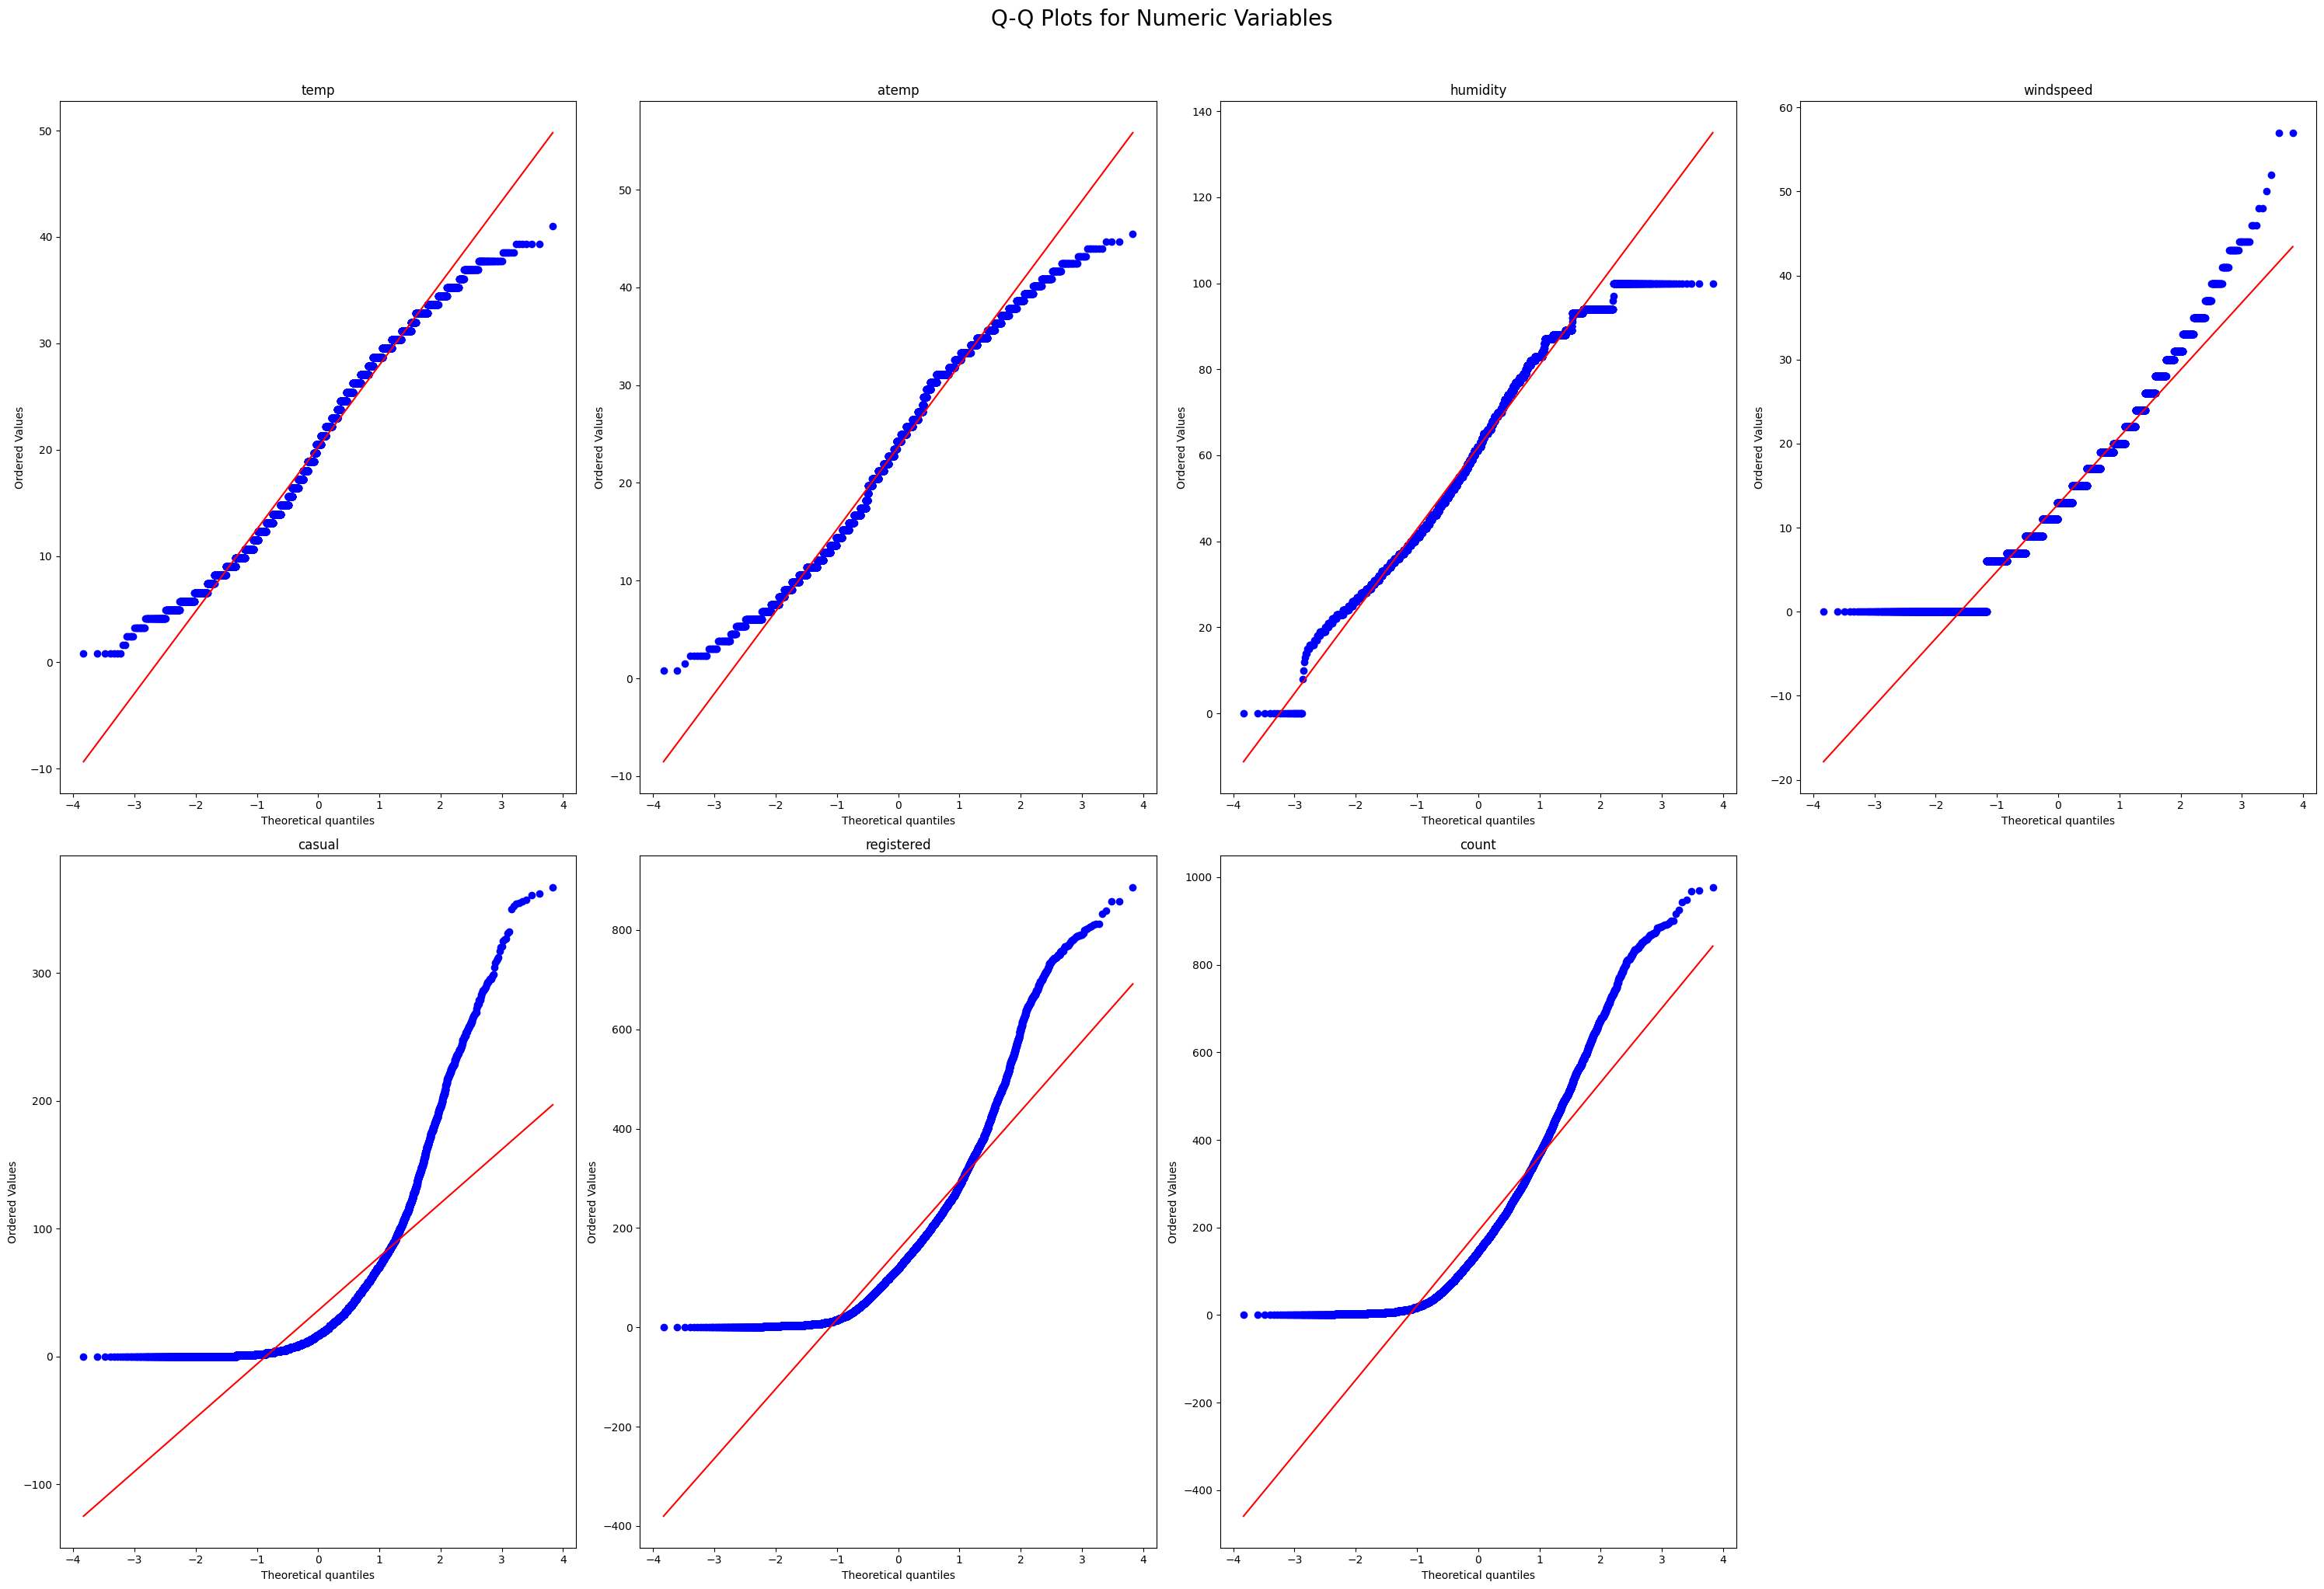

In [37]:
import pylab



# Plot Q-Q plots for all numeric variables
plt.figure(figsize=(30, 20))

# Subplot indices
subplot_indices = range(1, len(yulu_cont.columns) + 1)

for i, column in zip(subplot_indices, yulu_cont.columns):
    ax = plt.subplot(2, 4, i)
    stats.probplot(yulu_cont[column], dist="norm", plot=pylab)
    ax.set_title(column)

plt.suptitle('Q-Q Plots for Numeric Variables', y=1.02, fontsize=20)
plt.tight_layout()
plt.show()


Observation:
- The Q-Q plots reveal that none of the variables exhibit a straight line pattern, indicating a departure from a normal distribution.
- This suggests that the data distributions deviate from the expected normal behavior

# Equal Variance(homogeneity of variance) Test


**Levene's Test for Equality of Variance - Number of Riders Across 4 Seasons:**

**Assumptions:**
1. Samples collected from the population are independent of each other.
2. The population data is approximately normal in distribution.

**Hypothesis Framework:**

- Null Hypothesis (Ho): The variance is equal for all seasons.
- Alternative Hypothesis (H1): The variance is not equal for all seasons (indicating that at least one season has a variance different from the others).

**Significance Level (α):** 0.05 or 5%

**Levene's Test-Statistic:**
- Given the skewed distribution of data across all seasons, the median will be utilized as the test statistic for Levene's Test.


In [38]:


weather_clear = np.array(yulu_df[yulu_df.weather == 'clear']['count'])
weather_partly_clear = np.array(yulu_df[yulu_df.weather == 'partly_clear']['count'])
weather_rain = np.array(yulu_df[yulu_df.weather == 'rain']['count'])


# Perform Levene's Test
statistic, p_value = levene(weather_clear, weather_partly_clear, weather_rain, center='median')

# Print results
print(f'Levene\'s Test Statistic: {statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value <= alpha:
    print("\nReject the null hypothesis. There is evidence of unequal variances.")
else:
    print("\nFail to reject the null hypothesis. Variances appear to be equal.")


Levene's Test Statistic: 81.67574924435011
P-value: 6.198278710731511e-36

Reject the null hypothesis. There is evidence of unequal variances.


Observation:
- With the  p-value significantly below the chosen Significance Level
α=0.05), we unequivocally reject the null hypothesis.
- This null hypothesis posited that the variance is equal for all seasons.
- Consequently, we can infer, with a high degree of confidence (95%), that the variance across seasons is not equal. Thus, there exists evidence suggesting that at least one season exhibits a variance distinct from the others.


**Levene's Test for equality of variance for number of riders for 4 different weather:**

**Assumptions:**
1. Samples collected from the population are independent of each other

2. The population data is approximately normal in distribution

**Hypothesis Framework:**

- Null Hypothesis (Ho): Variance is equal for all weathers.

- Alternative Hypothesis (H1): Variance is not equal for all weathers (atleast one of the weather has a variance different from the others).

**Significance Level (α):** 0.05 or 5%

**Levene's Test-Statistic:**
- As the data for all the weathers is skewed in distribution, we will use the median for test statistics.




In [39]:
from scipy.stats import levene

season_spring = np.array(yulu_df[yulu_df.season == 'spring']['count'])
season_summer = np.array(yulu_df[yulu_df.season == 'summer']['count'])
season_fall = np.array(yulu_df[yulu_df.season == 'fall']['count'])
season_winter = np.array(yulu_df[yulu_df.season == 'winter']['count'])


# Perform Levene's Test
test_statistic, p_value = levene(season_spring, season_summer, season_fall, season_winter, center='median')

# Print results
print(f'Levene\'s Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value <= alpha:
    print("\nReject the null hypothesis. There is evidence of unequal variances among weathers.")
else:
    print("\nFail to reject the null hypothesis. Variances appear to be equal among weathers.")


Levene's Test Statistic: 187.7706624026276
P-value: 1.0147116860043298e-118

Reject the null hypothesis. There is evidence of unequal variances among weathers.


Observation:
- With a remarkably low p-value of  significantly below the chosen significance level (α=0.05), we unequivocally reject the null hypothesis asserting equal variance among all weathers.
- This compelling evidence at a 95% confidence level indicates that the variances among weathers are not equal; there exists substantial variation, and at least one weather condition exhibits a variance distinct from the others.

**Levene's Test for equality of variance for number of riders as per working day:**

**Assumptions:**
1. Samples collected from the population are independent of each other

2. The population data is approximately normal in distribution

**Hypothesis Framework:**

- Null Hypothesis (Ho): Variance is equal irrespective of working day or not

- Alternative Hypothesis (H1): Variance is not equal irrespective of working day or not

**Significance Level (α):** 0.05 or 5%

**Levene's Test-Statistic:**
-  As the data for workingday or not is skewed in distribution, we will use the median for test statistics.




In [40]:
working_day_no = np.array(yulu_df[yulu_df.workingday == 'no']['count'])
working_day_yes = np.array(yulu_df[yulu_df.workingday == 'yes']['count'])

# Perform Levene's Test
test_statistic, p_value = levene(working_day_no, working_day_yes, center='median')

# Print results
print(f'Levene\'s Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value <= alpha:
    print("\nReject the null hypothesis. There is evidence of unequal variances irrespective of working day.")
else:
    print("\nFail to reject the null hypothesis. Variances appear to be equal irrespective of working day.")


Levene's Test Statistic: 0.004972848886504472
P-value: 0.9437823280916695

Fail to reject the null hypothesis. Variances appear to be equal irrespective of working day.


Observations:
- Given the p-value of 0.944, which surpasses the chosen significance level (α = 0.05), we do not have sufficient evidence to reject the null hypothesis.
- Consequently, we conclude that, at a 95% confidence level, the variance remains equal regardless of whether it is a working day or not.

**Levene's Test for equality of variance for number of riders as per holiday:**

**Assumptions:**
1. Samples collected from the population are independent of each other

2. The population data is approximately normal in distribution

**Hypothesis Framework:**

- Null Hypothesis (Ho): Variance is equal irrespective of holiday or not.

- Alternative Hypothesis (H1): Variance is not equal irrespective of working day or not

**Significance Level (α):** 0.05 or 5%

**Levene's Test-Statistic:**
- As the data for workingday or not is skewed in distribution, we will use the median for test statistics.


In [41]:

# Perform Levene's Test
test_statistic, p_value = levene(
    np.array(yulu_df[yulu_df.holiday == 'no']['count']),
    np.array(yulu_df[yulu_df.holiday == 'yes']['count']),
    center='median'
)

# Print results
print(f'Levene\'s Test Statistic: {test_statistic}')
print(f'P-value: {p_value}')

# Compare p-value to significance level (e.g., 0.05)
alpha = 0.05
if p_value <= alpha:
    print("\nReject the null hypothesis. There is evidence of unequal variances irrespective of holiday.")
else:
    print("\nFail to reject the null hypothesis. Variances appear to be equal irrespective of holiday.")


Levene's Test Statistic: 1.222306875221986e-06
P-value: 0.9991178954732041

Fail to reject the null hypothesis. Variances appear to be equal irrespective of holiday.


Observation:

- Given the p-value of 0.999, which exceeds the chosen significance level (α=0.05), we lack substantial evidence to reject the null hypothesis.
- Consequently, we conclude that, at a 95% confidence level, the variance remains equal irrespective of whether it is a holiday or not.

#### Additional Test -  Shapiro-Wilk Test
Shapiro-Wilk Test is used to test Normality.


**Assumptions:**
1. The sample is coming from a normal distribution


**Hypothesis Framework:**

- Null Hypothesis (Ho): Sample comes from a normal distribution.

- Alternative Hypothesis (H1): Sample is not coming from a population which is normally distributed

**Significance Level (α):** 0.05 or 5%

**Shapiro-Wilk Test:**
- Shapiro-Wilk Test is used to test Normality.


In [42]:


print('Normality Test Results:')
print()

for column in yulu_cont.columns:
    test_statistic, p_value = shapiro(yulu_cont[column])

    print('-' * 90)
    print(f'Test-statistic for {column}: {test_statistic} | p-value: {p_value}')

    if p_value > 0.05:
        print('Therefore, at a 95% confidence level, we fail to reject the null hypothesis.')
        print(f'This suggests that the data in column {column} comes from a normally distributed population.')
    else:
        print('Therefore, at a 95% confidence level, we reject the null hypothesis.')
        print(f'This indicates that the data in column {column} does not come from a normally distributed population.')

    print('-' * 90)
    print()


Normality Test Results:

------------------------------------------------------------------------------------------
Test-statistic for temp: 0.9804227352142334 | p-value: 4.577117001754969e-36
Therefore, at a 95% confidence level, we reject the null hypothesis.
This indicates that the data in column temp does not come from a normally distributed population.
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
Test-statistic for atemp: 0.9815532565116882 | p-value: 3.35599504562436e-35
Therefore, at a 95% confidence level, we reject the null hypothesis.
This indicates that the data in column atemp does not come from a normally distributed population.
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
Test-statistic for humidity: 

Observation:
- In summary, the Shapiro-Wilk test suggests that the distribution of each variable significantly deviates from a normal distribution.

- This has implications for statistical analyses that assume normality, and alternative approaches may be considered for these variables.


# Recommendations based on Data Analysis

## Impact of Holidays
Based on the results of the 2 Sample T-test, indicating no significant impact of holidays on the number of riders at a 95% confidence level, Yulu is advised to implement consistent promotional campaigns and offers regardless of whether it is a holiday or a regular day.

## Working Days
The 2 Sample T-test results demonstrate that working days do not significantly affect the number of riders at a 95% confidence level. Therefore, Yulu is recommended to run consistent promotional campaigns and offers irrespective of whether it is a working day or not.

## Seasonal Strategies
The Analysis of Variance (ANOVA) reveals statistically different mean numbers of riders for various seasons at a 95% confidence level. Yulu should tailor its strategies for different seasons, focusing on boosting ridership during fall and winter when ridership tends to decline, and maximizing e-bike capacity utilization during summer and fall.

## Weather-Based Approaches
According to the ANOVA results for different weather conditions, Yulu should adopt distinct strategies based on weather. Specifically, efforts should be concentrated on optimizing e-bike capacity utilization during clear or partly clear weather conditions.

## Weather and Season Dependence
The Chi-Square Test indicates a dependence between weather and seasons at a 95% confidence level. Yulu should aim to maximize e-bike capacity utilization in every season, particularly during clear or partly clear weather.

## Demand Forecasting
Given the identified trend and seasonality in the data, Yulu is encouraged to invest in robust demand forecasting. Enhanced forecasting accuracy will contribute to better capacity utilization of e-bikes across different seasons.

## Demographic Investigation
Yulu should conduct a more in-depth investigation into rider demographics, including gender and age. Insights into specific age brackets and gender preferences can provide valuable information for optimizing week-to-week capacity utilization and tailoring services to the preferences of different customer segments.




# Recommendations:

## Unified Promotional Strategies:
**Recommendation:** Implement consistent promotional campaigns and offers throughout the year, regardless of whether it is a holiday or a regular day. This suggestion is based on the non-significant impact of holidays on rider numbers, as indicated by the 2 Sample T-test at a 95% confidence level.

## Consistent Promotions for Working Days:
**Recommendation:** Run consistent promotional campaigns and offers irrespective of whether it is a working day or not. This advice is drawn from the non-significant impact of working days on rider numbers, as revealed by the results of the 2 Sample T-test at a 95% confidence level.

## Season-Specific Strategies:
**Recommendation:** Tailor strategies for different seasons based on the statistically different mean numbers of riders revealed by the Analysis of Variance (ANOVA) at a 95% confidence level. Focus efforts on increasing ridership during fall and winter, and maximize e-bike capacity utilization in summer and fall.

## Weather-Adaptive Approaches:
**Recommendation:** Adopt distinct strategies based on weather conditions, emphasizing efforts to optimize e-bike capacity utilization during clear or partly clear weather. This suggestion is supported by the statistically different mean numbers of riders across different weathers from ANOVA at a 95% confidence level.

## Maximize Capacity in Favorable Weather:
**Recommendation:** Maximize e-bike capacity utilization in every season, particularly during clear or partly clear weather. This recommendation aligns with the observed dependence between weather and seasons from the Chi-Square Test at a 95% confidence level.

## Invest in Demand Forecasting:
**Recommendation:** Implement robust demand forecasting practices, considering the identified trend and seasonality in the data. Improved forecasting accuracy will contribute to better capacity utilization of e-bikes across different seasons.

## Demographic Insight Utilization:
**Recommendation:** Conduct further investigation into rider demographics, particularly gender and age. Leverage insights into age brackets and gender preferences to optimize week-to-week capacity utilization and tailor services to the preferences of different customer segments.
